OpenStreetMap


In [ ]:
!pip install pandana osmnx
!pip install contextily
!pip install h3
!pip install shapely
!pip install husl
!pip install osmnet
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for husl: filename=husl-4.0.3-py3-none-any.whl size=3497 sha256=2d47ebd1f7fa002f5ac9157d8125318ee7fe3a22f02904a1f670a6b2ca63c0e9
  Stored in directory: /root/.cache/pip/wheels/3c/c2/70/781bfd1c38ef6db9ecc604b125054b3d73dd37bc0d65b30bb9
Successfully built husl


In [ ]:
from pandana.loaders import osm
import osmnx as ox
import warnings
import pandana
import pandas as pd
import geopandas as gpd
import contextily as cx
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import mapclassify
import requests
import csv
import json
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

# Melody's Code - Pull OSM Park Data

In [ ]:
place = {"city": "Oakland", "state": "California"}
parks = ox.features_from_place(place, {"leisure": "park"})
len(parks)

174

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


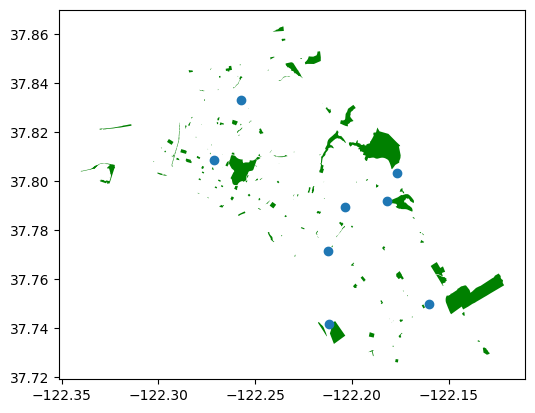

In [ ]:
parks.plot(facecolor = "green")

In [ ]:
## Drop all the nodes - include only the polygons
parks_w = parks.loc['way'].copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
## Pull amenities associated with parks from OSM
#park_amenity = ['bbq', 'bench','bicycle_parking', 'bicycle_rental', 'bicycle_repair_station', 'bus_station', 'clock',]
amenities = ox.features_from_place(place, {"amenity": True})
amenities[['amenity']].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity         
parking             1235
restaurant           535
bench                314
bicycle_parking      299
place_of_worship     297
                    ... 
p                      1
parcel_locker          1
pet_relief_area        1
planetarium            1
karaoke_box            1
Name: count, Length: 120, dtype: int64

In [ ]:
print(amenities.amenity.sort_values().unique())

['amusements' 'animal_boarding' 'animal_shelter' 'archive' 'arts_centre'
 'atm' 'bank' 'bar' 'bbq' 'bench' 'bicycle_parking' 'bicycle_rental'
 'bicycle_repair_station' 'biergarten' 'binoculars' 'boat_rental'
 'bus_station' 'cafe' 'car_rental' 'car_sharing' 'car_wash'
 'casual carpoool pickup' 'charging_station' 'childcare' 'chiropractor'
 'cinema' 'civic' 'clinic' 'clock' 'college' 'community_centre'
 'conference_centre' 'convenience_store' 'courthouse' 'coworking_space'
 'crematorium' 'dancing_school' 'day_care' 'dentist'
 'device_charging_station' 'doctors' 'dog_toilet' 'dojo' 'dressing_room'
 'drinking_water' 'driving_school' 'education_centre' 'event'
 'event_space' 'events_venue' 'fast_food' 'ferry_terminal' 'fire_station'
 'food_court' 'fountain' 'framing' 'fuel' 'grave_yard' 'hospital'
 'ice_cream' 'karaoke_box' 'kindergarten' 'leaning_bench' 'library'
 'loading_dock' 'marketplace' 'monastery' 'mortuary' 'motorcycle_parking'
 'music_school' 'music_venue' 'nightclub' 'nursing_hom

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

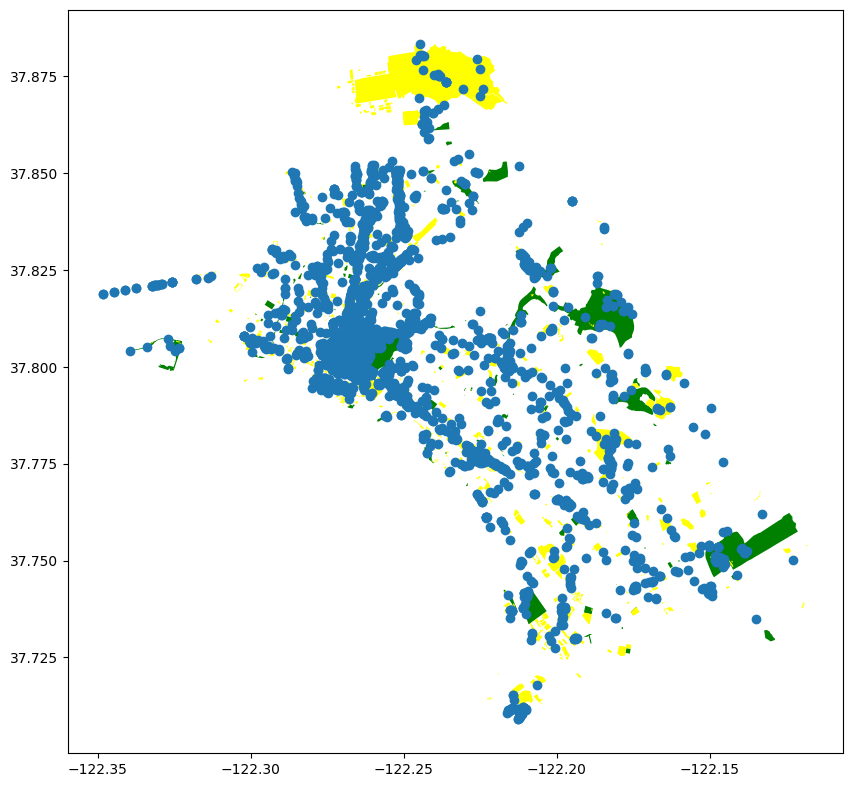

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
## Plot amenities and parks
fig, axes = mpl.pyplot.subplots(figsize = (10, 20))
parks_w.plot(ax = axes, facecolor = "green")
amenities.plot(ax = axes , facecolor = "yellow")

In [ ]:
## Spatial Join
park_amenities = amenities.sjoin(parks_w, how = "inner")
park_amenities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

amenity created_by_left  \
element_type osmid                                          
node         246294774       fire_station             NaN   
             3505276249    drinking_water             NaN   
             6139632123             bench             NaN   
             7934990621           parking             NaN   
way          343728979            toilets             NaN   
...                                   ...             ...   
             687735715            parking             NaN   
             687735718             school             NaN   
             1141922873           toilets             NaN   
             1154593299  place_of_worship             NaN   
             1233359522           shelter             NaN   

                                                                  geometry  \
element_type osmid                                                           
node         246294774                         POINT (-122.20341 37.82349)   
             3505276249                        POINT (-122.20207 37.82543)   
             6139632123                        POINT (-122.20550 37.82482)   
             7934990621                        POINT (-122.20241 37.82542)   
way          343728979   POLYGON ((-122.20194 37.82531, -122.20193 37.8...   
...                                                                    ...   
             687735715   POLYGON ((-122.27599 37.83285, -122.27595 37.8...   
             687735718   POLYGON ((-122.27700 37.83300, -122.27637 37.8...   
             1141922873  POLYGON ((-122.24107 37.79006, -122.24111 37.7...   
             1154593299  POLYGON ((-122.23593 37.77783, -122.23618 37.7...   
             1233359522  POLYGON ((-122.25865 37.82074, -122.25864 37.8...   

                        barrier access_left                    operator_left  \
element_type osmid                                                             
node         246294774      NaN         NaN                              NaN   
             3505276249     NaN         NaN                              NaN   
             6139632123     NaN         NaN                              NaN   
             7934990621     NaN   customers                              NaN   
way          343728979      NaN         NaN                              NaN   
...                         ...         ...                              ...   
             687735715    fence     private                              NaN   
             687735718      NaN         NaN  Oakland Unified School District   
             1141922873     NaN         NaN                              NaN   
             1154593299     NaN         NaN                              NaN   
             1233359522     NaN         NaN                              NaN   

                        brand compressed_air description_left  \
element_type osmid                                              
node         246294774    NaN            NaN              NaN   
             3505276249   NaN            NaN              NaN   
             6139632123   NaN            NaN              NaN   
             7934990621   NaN            NaN              NaN   
way          343728979    NaN            NaN              NaN   
...                       ...            ...              ...   
             687735715    NaN            NaN              NaN   
             687735718    NaN            NaN              NaN   
             1141922873   NaN            NaN              NaN   
             1154593299   NaN            NaN              NaN   
             1233359522   NaN            NaN              NaN   

                                                      name_left  ...  \
element_type osmid                                               ...   
node         246294774                  Oakland Fire Station 24  ...   
             3505276249                                     NaN  ...   
             6139632123                           

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

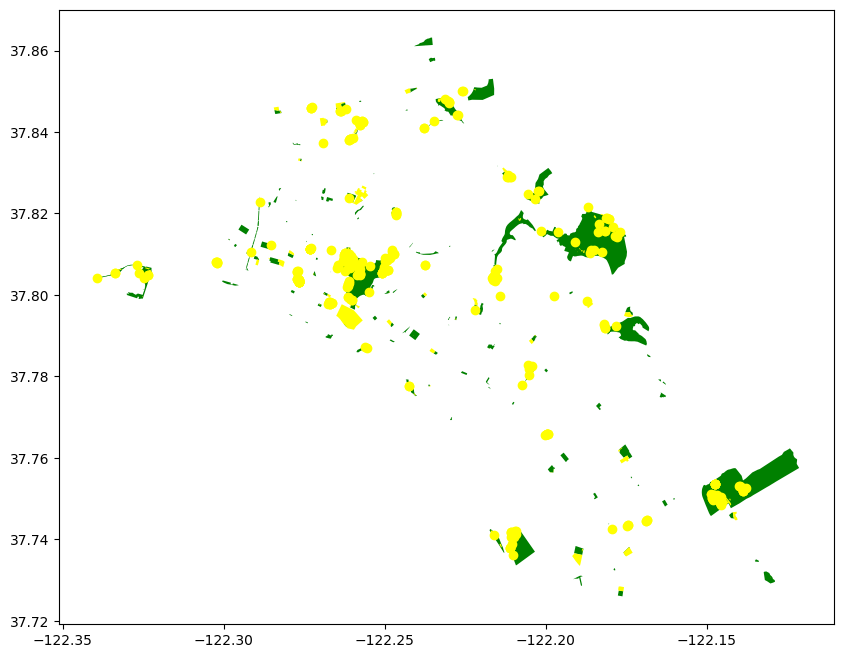

In [ ]:
fig, axes = mpl.pyplot.subplots(figsize = (10, 20))
parks_w.plot(ax = axes, facecolor = "green")
park_amenities.plot(ax = axes , facecolor = "yellow", color= 'yellow')

In [ ]:
parks_w

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry  ele  \
osmid                                                                
22672037    POLYGON ((-122.26449 37.80775, -122.26447 37.8...  NaN   
22699821    POLYGON ((-122.26157 37.82508, -122.26050 37.8...  NaN   
22716950    POLYGON ((-122.23420 37.84808, -122.23414 37.8...  155   
22921484    POLYGON ((-122.27179 37.80586, -122.27134 37.8...  NaN   
22958275    POLYGON ((-122.26516 37.84592, -122.26346 37.8...  NaN   
...                                                       ...  ...   
1063770410  POLYGON ((-122.26122 37.83815, -122.26091 37.8...  NaN   
1185885883  POLYGON ((-122.16490 37.77924, -122.16469 37.7...  NaN   
1185885884  POLYGON ((-122.16365 37.77848, -122.16370 37.7...  NaN   
1268787322  POLYGON ((-122.23591 37.85715, -122.23475 37.8...  NaN   
1280217080  POLYGON ((-122.16839 37.78541, -122.16752 37.7...  NaN   

           gnis:county_id gnis:created gnis:feature_id gnis:state_id leisure  \
osmid                                                                          
22672037              NaN          NaN         1693069           NaN    park   
22699821              NaN          NaN          229125           NaN    park   
22716950              001   01/19/1981          226812            06    park   
22921484              NaN          NaN             NaN           NaN    park   
22958275              NaN          NaN         1676001           NaN    park   
...                   ...          ...             ...           ...     ...   
1063770410            NaN          NaN             NaN           NaN    park   
1185885883            NaN          NaN             NaN           NaN    park   
1185885884            NaN          NaN             NaN           NaN    park   
1268787322            NaN          NaN             NaN           NaN    park   
1280217080            NaN          NaN             NaN           NaN    park   

                                          name   wikidata     source  ...  \
osmid                                                                 ...   
22672037                             Snow Park  Q49562766        NaN  ...   
22699821                         Mosswood Park   Q6916706  Tiger2009  ...   
22716950     Temescal Regional Recreation Area   Q7698102  Tiger2009  ...   
22921484                  Frank H. Ogawa Plaza   Q5487030        NaN  ...   
22958275                          Bushrod Park   Q5001569  Tiger2009  ...   
...                                        ...        ...        ...  ...   
1063770410                    Little Frog Park        NaN        NaN  ...   
1185885883                                 NaN        NaN        NaN  ...   
1185885884                                 NaN        NaN        NaN  ...   
1268787322  Vicente Canyon Hillside Open Space        NaN        NaN  ...   
1280217080                                 NaN        NaN        NaN  ...   

           addr:postcode addr:state description surface covered  \
osmid                                                             
22672037             NaN        NaN         NaN     NaN     NaN   
22699821             NaN        NaN         NaN     NaN     NaN   
22716950             NaN        NaN         NaN     NaN     NaN   
22921484             NaN        NaN         NaN     NaN     NaN   
22958275             NaN        NaN         NaN     NaN     NaN   
...                  ...        ...         ...     ...     ...   
1063770410           NaN        NaN         NaN     NaN     NaN   
1185885883           NaN        NaN         NaN     NaN     NaN   
1185885884           NaN        NaN         NaN     NaN     NaN   
1268787322           NaN        NaN         NaN     NaN     NaN   
1280217080           NaN        NaN         NaN     NaN     NaN   

                                         owner ways type operator:wikidata  \
osmid                                                                        
22672037                                   NaN  NaN  NaN               

In [ ]:
pd.crosstab(park_amenities['name_right'], park_amenities['amenity'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

amenity                  bbq  bench  bicycle_parking  bicycle_rental  \
name_right                                                             
14th Street Pocket Park    0      0                0               0   
Allendale Park             0      0                0               0   
Arrowhead Park             0      6                0               0   
Arroyo Viejo Park          0      0                0               0   
Ayala Park                 0      1                0               0   
...                      ...    ...              ...             ...   
Union Point Park           0      0                0               0   
Wade Johnson Park          0      0                0               0   
Warren Hook Park           0      2                0               0   
Wilma Chan Park            0     11                0               0   
de Fremery Park            0      0                0               1   

amenity                  bicycle_repair_station  binoculars  boat_rental  \
name_right                                                                 
14th Street Pocket Park                       0           0            0   
Allendale Park                                0           0            0   
Arrowhead Park                                0           0            0   
Arroyo Viejo Park                             0           0            0   
Ayala Park                                    0           0            0   
...                                         ...         ...          ...   
Union Point Park                              0           0            0   
Wade Johnson Park                             0           0            0   
Warren Hook Park                              0           0            0   
Wilma Chan Park                               0           0            0   
de Fremery Park                               0           0            0   

amenity                  cafe  charging_station  cinema  ...  school  \
name_right                                               ...           
14th Street Pocket Park     0                 0       0  ...       0   
Allendale Park              0                 0       0  ...       1   
Arrowhead Park              0                 0       0  ...       0   
Arroyo Viejo Park           0                 0       0  ...       1   
Ayala Park                  0                 0       0  ...       0   
...                       ...               ...     ...  ...     ...   
Union Point Park            0                 0       0  ...       0   
Wade Johnson Park           0                 0       0  ...       1   
Warren Hook Park            0                 0       0  ...       0   
Wilma Chan Park             0                 0       0  ...       0   
de Fremery Park             0                 0       0  ...       0   

amenity                  senior_center  shelter  shower  social_facility  \
name_right                                                                 
14th Street Pocket Park              0        2       0                0   
Allendale Park                       0        0       0                0   
Arrowhead Park                       0        0       0                0   
Arroyo Viejo Park                    0        0       0                0   
Ayala Park                           0        0       0                0   
...                                ...      ...     ...              ...   
Union Point Park                     0        0       0                0   
Wade Johnson Park                    0        0       0                0   
Warren Hook Park                     0        0       0                0   
Wilma Chan Park                      0        0       0                0   
de Fremery Park                      0        0       0                0   

amenity                  table  theatre  toilets  veterinary  waste_basket  
name_right                                                             

In [ ]:
# Clean park amenity data
park_amenities_clean = park_amenities[['amenity', 'name_right','geometry']]
park_amenities_clean

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity            name_right  \
element_type osmid                                                
node         246294774       fire_station  Shepherd Canyon Park   
             3505276249    drinking_water  Shepherd Canyon Park   
             6139632123             bench  Shepherd Canyon Park   
             7934990621           parking  Shepherd Canyon Park   
way          343728979            toilets  Shepherd Canyon Park   
...                                   ...                   ...   
             687735715            parking           Linden Park   
             687735718             school           Linden Park   
             1141922873           toilets      San Antonio Park   
             1154593299  place_of_worship    Kennedy Tract Park   
             1233359522           shelter         Oak Glen Park   

                                                                  geometry  
element_type osmid                                                          
node         246294774                         POINT (-122.20341 37.82349)  
             3505276249                        POINT (-122.20207 37.82543)  
             6139632123                        POINT (-122.20550 37.82482)  
             7934990621                        POINT (-122.20241 37.82542)  
way          343728979   POLYGON ((-122.20194 37.82531, -122.20193 37.8...  
...                                                                    ...  
             687735715   POLYGON ((-122.27599 37.83285, -122.27595 37.8...  
             687735718   POLYGON ((-122.27700 37.83300, -122.27637 37.8...  
             1141922873  POLYGON ((-122.24107 37.79006, -122.24111 37.7...  
             1154593299  POLYGON ((-122.23593 37.77783, -122.23618 37.7...  
             1233359522  POLYGON ((-122.25865 37.82074, -122.25864 37.8...  

[512 rows x 3 columns]

In [ ]:
## Seeing which amenities are available and which ones we should potentially drop
park_amenities_clean['amenity'].value_counts()
#park_amenities_clean['name_right'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity
bench                     179
parking                    64
drinking_water             60
toilets                    48
school                     22
bicycle_parking            21
waste_basket               17
community_centre           13
fountain                   13
table                       9
shelter                     8
theatre                     7
cafe                        7
bbq                         6
restaurant                  4
bicycle_rental              3
parking_space               3
library                     3
binoculars                  2
boat_rental                 2
college                     1
bicycle_repair_station      1
fire_station                1
kindergarten                1
senior_center               1
public_bookcase             1
hospital                    1
social_facility             1
veterinary                  1
planetarium                 1
ice_cream                   1
education_centre            1
charging_station            1
ma

laurel's osm cleaning

In [ ]:
#drop outlier amenities

amenities_to_keep = ['bbq','bench','drinking_water','toilets',
                     'bicycle_parking','waste_basket',
                     'community_centre','table','shelter','theatre']

# Drop rows with specific variables in the 'amenity' column
filtered_park_amenities = park_amenities_clean[park_amenities_clean['amenity'].isin(amenities_to_keep)]
filtered_park_amenities['name_right'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count               352
unique               54
top       Lakeside Park
freq                 70
Name: name_right, dtype: object

In [ ]:
#check that the dropping worked --> it did!
filtered_park_amenities['amenity'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


amenity
bench               179
drinking_water       60
toilets              48
bicycle_parking      21
waste_basket         17
community_centre     13
table                 9
shelter               8
theatre               7
bbq                   6
Name: count, dtype: int64

In [ ]:
filtered_park_amenities['name_right'].unique()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Shepherd Canyon Park', 'Temescal Regional Recreation Area',
       'Lakeside Park', 'Gateway', 'Joaquin Miller Park', 'Snow Park',
       'Middle Harbor Shoreline Park', 'Helen McGregor Plaza Park', nan,
       'Preservation Park', 'Splash Pad Park', 'Knowland Park',
       'Mosswood Park', 'Union Point Park',
       'Morcom Amphitheatre of Roses', 'Ayala Park',
       'Montclair Playground', 'Arrowhead Park', 'Brookdale Park',
       'Eastshore Park', 'Central Reservoir Recreation Area',
       'Dimond Park', 'Hardy Park & Dog Park',
       'Rockridge-Temescal Greenbelt', 'Lafayette Square', 'Bushrod Park',
       'Leona Heights Park', 'de Fremery Park', 'Warren Hook Park',
       'Portview Park', 'Lakeshore Park', 'Ostrander Park',
       'Little Frog Park', 'Bishop Floyd L. Begin Plaza',
       'Rainbow Recreation Center', 'Courtland Creek Park',
       'Wilma Chan Park', 'Elmhurst Park',
       'Redwood Heights Recreation Center', 'Holly Mini Park',
       'McCrea Park', 'B

In [ ]:
len(filtered_park_amenities['name_right'].unique())

55

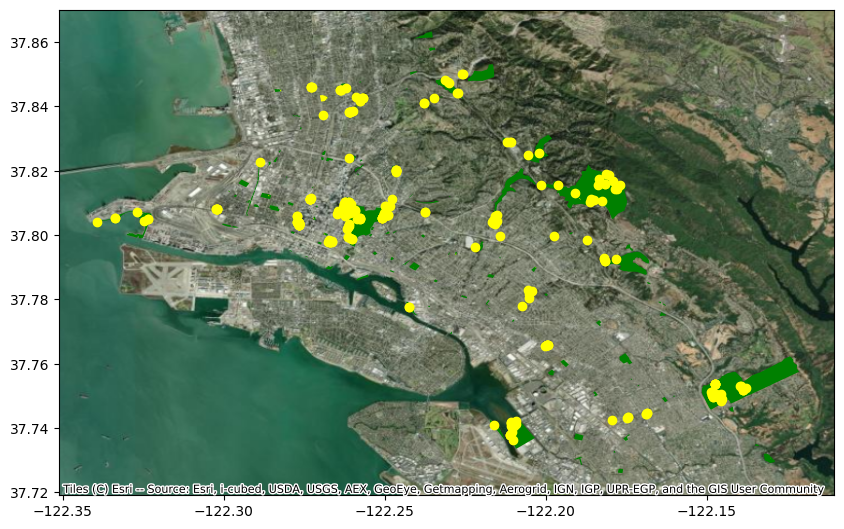

In [ ]:
#map of just the amenities we're including

fig, axes = mpl.pyplot.subplots(figsize = (10, 20))
parks_w.plot(ax = axes, facecolor = "green")
filtered_park_amenities.plot(ax = axes , facecolor = "yellow", color= 'yellow')
cx.add_basemap(
    axes,
    crs = filtered_park_amenities.crs.to_string(),
    source = cx.providers.Esri.WorldImagery
)

# Laurel bringing Oakland parks data in and joining

In [ ]:
### Pull in the Oakland Park list and then join the amenities from OpenStreetMap to that Park list (need to dataclean first)
oak_parks = gpd.read_file("https://data.oaklandca.gov/resource/qyh9-i9dw.geojson")
oak_parks_only = oak_parks[oak_parks['facility_type'] == 'Park']
len(oak_parks)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

241

In [ ]:
oak_parks

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


facility_type                 location_1_address    phone_number  \
0    Community Gardens                 83rd and E Streets  (510) 238-2208   
1                 Park                   2500 34th Avenue  (510) 238-PARK   
2         Tennis Court                  7921 Olive Street  (510) 444-5663   
3                 Park                 1701 E 19th Street  (510) 238-PARK   
4                 Park              9600 Sunnyside Street  (510) 238-PARK   
..                 ...                                ...             ...   
236  Recreation Center              1701 East 19th Street  (510) 535-5608   
237  Community Gardens    96th Avenue and Bancroft Avenue  (510) 238-2210   
238               Park  Lakeshore Avenue & Hanover Avenue  (510) 238-PARK   
239  Recreation Center                   2535 High Street  (510) 535-5632   
240     Athletic Field        Chabot Rd & Golden Gate Ave  (510) 238-3501   

    parks_and_recreation_facilities  \
0                 Tassafaronga Park   
1             Peralta Hacienda Park   
2           Arroyo Viejo, Lucky A's   
3                  San Antonio Park   
4               Verdese Carter Park   
..                              ...   
236                     San Antonio   
237             Verdese Carter Park   
238                 Pine Knoll Park   
239                       Brookdale   
240                          Chabot   

                                                   url location_1_city  \
0                                                 None         Oakland   
1    {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
2    {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
3    {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
4    {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
..                                                 ...             ...   
236  {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
237  {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
238  {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
239  {'url': 'http://www2.oaklandnet.com/Government...         Oakland   
240  {'url': 'http://www2.oaklandnet.com/Government...         Oakland   

    location_1_state location_1_zip                     geometry  
0                 CA           None  POINT (-122.18485 37.75171)  
1                 CA           None  POINT (-122.21683 37.78753)  
2                 CA           None  POINT (-122.17387 37.76126)  
3                 CA           None  POINT (-122.23993 37.79101)  
4                 CA           None  POINT (-122.16335 37.74854)  
..               ...            ...                          ...  
236               CA           None  POINT (-122.23993 37.79101)  
237               CA           None  POINT (-122.16301 37.74977)  
238               CA           None  POINT (-122.27302 37.80506)  
239               CA           None  POINT (-122.20494 37.78179)  
240               CA           None  POINT (-122.27302 37.80506)  

[241 rows x 9 columns]

In [ ]:
#Clean Oakland Park list data
oak_parks = oak_parks[['parks_and_recreation_facilities', 'facility_type', 'geometry']]
oak_parks

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


parks_and_recreation_facilities      facility_type  \
0                 Tassafaronga Park  Community Gardens   
1             Peralta Hacienda Park               Park   
2           Arroyo Viejo, Lucky A's       Tennis Court   
3                  San Antonio Park               Park   
4               Verdese Carter Park               Park   
..                              ...                ...   
236                     San Antonio  Recreation Center   
237             Verdese Carter Park  Community Gardens   
238                 Pine Knoll Park               Park   
239                       Brookdale  Recreation Center   
240                          Chabot     Athletic Field   

                        geometry  
0    POINT (-122.18485 37.75171)  
1    POINT (-122.21683 37.78753)  
2    POINT (-122.17387 37.76126)  
3    POINT (-122.23993 37.79101)  
4    POINT (-122.16335 37.74854)  
..                           ...  
236  POINT (-122.23993 37.79101)  
237  POINT (-122.16301 37.74977)  
238  POINT (-122.27302 37.80506)  
239  POINT (-122.20494 37.78179)  
240  POINT (-122.27302 37.80506)  

[241 rows x 3 columns]

In [ ]:
#Drop non-parks from Oakland Parks data
oak_parks_only = oak_parks[oak_parks['facility_type'] == 'Park']
oak_parks_only

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


parks_and_recreation_facilities facility_type  \
1                                Peralta Hacienda Park          Park   
3                                     San Antonio Park          Park   
4                                  Verdese Carter Park          Park   
6                                   Vantage Point Park          Park   
8                                    Arroyo Viejo Park          Park   
..                                                 ...           ...   
228                             Officer Willie Wilkins          Park   
229                              Fruitvale Bridge Park          Park   
231  Caldecott Field/North Oakland Regional Sports ...          Park   
233                              Marston Campbell Park          Park   
238                                    Pine Knoll Park          Park   

                        geometry  
1    POINT (-122.21683 37.78753)  
3    POINT (-122.23993 37.79101)  
4    POINT (-122.16335 37.74854)  
6    POINT (-122.24809 37.78914)  
8    POINT (-122.17620 37.76263)  
..                           ...  
228  POINT (-122.17534 37.74320)  
229  POINT (-122.22955 37.76940)  
231  POINT (-122.22239 37.85048)  
233  POINT (-122.27302 37.80506)  
238  POINT (-122.27302 37.80506)  

[127 rows x 3 columns]

#Data Matching

In [ ]:
oak_parks_new = gpd.read_file("https://data.oaklandca.gov/resource/byws-6ni8.geojson")
oak_parks_new = oak_parks_new[oak_parks_new['open_space'] == "PARK"]
oak_parks_new.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name installdat     shape_area location legacyid  \
0     Arroyo Viejo Park       None  818976.516891                     
1       Brookfield Park       None   689613.88252                     
2  Davie Tennis Stadium       None  217317.930936                     
3        Glen Echo Park       None  43685.4151426                     
4         Garfield Park       None  65888.5105064                     

          open_spa_1 totlot                  new_mainte objectid conditiond  \
0     Community Park      y                    Priority        1       None   
1     Community Park                           Priority        2       None   
2   Special Use Park         Little Routine Maintenance        8       None   
3        Linear Park         Little Routine Maintenance        9       None   
4  Neighborhood Park      y                    Priority       10       None   

   ... open_space tennis_nol                          address  \
0  ...       PARK                             7701 Krause Ave   
1  ...       PARK                               9100 Edes Ave   
2  ...       PARK          0  198 Oak Rd  94607\r\n198 Oak Rd   
3  ...       PARK                 Panama Ct & Monte Vista Ave   
4  ...       PARK                            2260 Foothill Bl   

             hubname maintainan tennis_lig restroom      shape_len dog_park  \
0  East-Arroyo Viejo                              y  4831.15160943            
1      East-Dunsmuir                                 3900.42174722            
2    North-Montclair                     5        y  1895.02303269            
3    North-Montclair                                 1835.61444211            
4       North-Dimond                                 1035.87911425            

                                            geometry  
0  MULTIPOLYGON (((-122.17399 37.76132, -122.1739...  
1  MULTIPOLYGON (((-122.18823 37.73768, -122.1886...  
2  MULTIPOLYGON (((-122.22964 37.81688, -122.2296...  
3  MULTIPOLYGON (((-122.25270 37.82409, -122.2528...  
4  MULTIPOLYGON (((-122.23430 37.78621, -122.2339...  

[5 rows x 31 columns]

In [ ]:
# Number of parks in each dataset
print(len(oak_parks_only))
print(len(oak_parks_new))

127
152


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
### Matching park to filtered amenities
amenities_names_list = filtered_park_amenities['name_right'].tolist()
oak_parks_only_list = oak_parks_only['parks_and_recreation_facilities'].tolist()
oak_parks_new_list = oak_parks_new['name'].tolist()

results_old = {}
results_new = {}
for i in amenities_names_list:
  results_old[i] = oak_parks_only_list.count(i)
  results_new[i] = oak_parks_new_list.count(i)
print(results_old)
print(results_new)

print(sum(results_old.values()))
print(sum(results_new.values()))


{'Shepherd Canyon Park': 1, 'Temescal Regional Recreation Area': 0, 'Lakeside Park': 1, 'Gateway': 0, 'Joaquin Miller Park': 1, 'Snow Park': 1, 'Middle Harbor Shoreline Park': 0, 'Helen McGregor Plaza Park': 1, nan: 0, 'Preservation Park': 0, 'Splash Pad Park': 1, 'Knowland Park': 1, 'Mosswood Park': 1, 'Union Point Park': 1, 'Morcom Amphitheatre of Roses': 0, 'Ayala Park': 1, 'Montclair Playground': 0, 'Arrowhead Park': 0, 'Brookdale Park': 0, 'Eastshore Park': 1, 'Central Reservoir Recreation Area': 0, 'Dimond Park': 1, 'Hardy Park & Dog Park': 1, 'Rockridge-Temescal Greenbelt': 0, 'Lafayette Square': 0, 'Bushrod Park': 1, 'Leona Heights Park': 0, 'de Fremery Park': 0, 'Warren Hook Park': 0, 'Portview Park': 0, 'Lakeshore Park': 0, 'Ostrander Park': 1, 'Little Frog Park': 0, 'Bishop Floyd L. Begin Plaza': 1, 'Rainbow Recreation Center': 0, 'Courtland Creek Park': 0, 'Wilma Chan Park': 0, 'Elmhurst Park': 0, 'Redwood Heights Recreation Center': 0, 'Holly Mini Park': 1, 'McCrea Park': 

In [ ]:
results_old = {}
results_new = {}

for i in oak_parks_only_list:
  results_old[i] = amenities_names_list.count(i)

for i in oak_parks_new_list:
  results_new[i] = amenities_names_list.count(i)
print(results_old)
print(results_new)

print(sum(results_old.values()))
print(sum(results_new.values()))

{'Peralta Hacienda Park': 0, 'San Antonio Park': 1, 'Verdese Carter Park': 0, 'Vantage Point Park': 0, 'Arroyo Viejo Park': 0, 'Mosswood Park': 2, 'Union Point Park': 2, 'Nicol Park': 0, 'Maxwell Park': 0, 'Avenue Terrance Park': 0, 'Durant Mini Park': 0, 'Beaconsfield Canyon\xa0\xa0\xa0\xa0': 0, 'Driver [Jasper P.] Plaza': 0, 'Tyrone Carney Park': 0, 'Concordia Park': 0, 'Ostrander Park': 3, 'King Estates': 0, 'Chabot Park': 1, 'Wood Park': 0, 'Union Plaza': 0, 'Redondo Park': 0, 'Marj Saunders Park\xa0': 0, 'Redwood Heights Park': 0, 'Willow Mini Park': 0, 'Channel Park': 0, 'Columbian Gardens Park': 0, 'Peralta Park': 0, 'Mandana Plaza Park': 0, 'Golden Gate Park\xa0': 0, 'Bella Vista Park': 0, 'Chinese Garden Park': 0, 'Linden Park': 0, 'Lowell Park': 0, 'Oak Glen Park': 1, 'Jefferson Square': 0, '25th Street Mini Park': 0, 'Stonehurst Park': 0, 'Madison Square Park': 0, 'Dover St Park': 0, 'Bishop Floyd L. Begin Plaza': 9, 'Poplar Park': 0, 'Estuary Channel Park': 0, 'Helen McGreg

In [ ]:
len(filtered_park_amenities)

368

# Merged Data

In [ ]:
amenities_df = pd.DataFrame(filtered_park_amenities.drop(columns = 'geometry'))
amenities_df

amenity                         name_right
element_type osmid                                                          
node         3505276249    drinking_water               Shepherd Canyon Park
             6139632123             bench               Shepherd Canyon Park
way          343728979            toilets               Shepherd Canyon Park
node         247361170            toilets  Temescal Regional Recreation Area
             247361231            toilets  Temescal Regional Recreation Area
...                                   ...                                ...
way          473388695            shelter            14th Street Pocket Park
             473389758            shelter            14th Street Pocket Park
             477465436   community_centre                                NaN
             1141922873           toilets                   San Antonio Park
             1233359522           shelter                      Oak Glen Park

[368 rows x 2 columns]

In [ ]:
parks_w = parks_w[['geometry', 'name', 'leisure']]
parks_w

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry  \
osmid                                                           
22672037    POLYGON ((-122.26449 37.80775, -122.26447 37.8...   
22699821    POLYGON ((-122.26157 37.82508, -122.26050 37.8...   
22716950    POLYGON ((-122.23420 37.84808, -122.23414 37.8...   
22921484    POLYGON ((-122.27179 37.80586, -122.27134 37.8...   
22958275    POLYGON ((-122.26516 37.84592, -122.26346 37.8...   
...                                                       ...   
1063770410  POLYGON ((-122.26122 37.83815, -122.26091 37.8...   
1185885883  POLYGON ((-122.16490 37.77924, -122.16469 37.7...   
1185885884  POLYGON ((-122.16365 37.77848, -122.16370 37.7...   
1268787322  POLYGON ((-122.23591 37.85715, -122.23475 37.8...   
1280217080  POLYGON ((-122.16839 37.78541, -122.16752 37.7...   

                                          name leisure  
osmid                                                   
22672037                             Snow Park    park  
22699821                         Mosswood Park    park  
22716950     Temescal Regional Recreation Area    park  
22921484                  Frank H. Ogawa Plaza    park  
22958275                          Bushrod Park    park  
...                                        ...     ...  
1063770410                    Little Frog Park    park  
1185885883                                 NaN    park  
1185885884                                 NaN    park  
1268787322  Vicente Canyon Hillside Open Space    park  
1280217080                                 NaN    park  

[163 rows x 3 columns]

In [ ]:
amenities_df = pd.DataFrame(filtered_park_amenities.drop(columns = 'geometry'))
merged_2 = parks_w.merge(amenities_df, how = 'left', left_on = 'name', right_on = 'name_right')
#filtered_park_amenities.merge(oak_parks_only, how = 'outer', left_on = 'name_right', right_on = 'parks_and_recreation_facilities')
merged_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   geometry    911 non-null    geometry
 1   name        431 non-null    object  
 2   leisure     911 non-null    object  
 3   amenity     832 non-null    object  
 4   name_right  352 non-null    object  
dtypes: geometry(1), object(4)
memory usage: 35.7+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

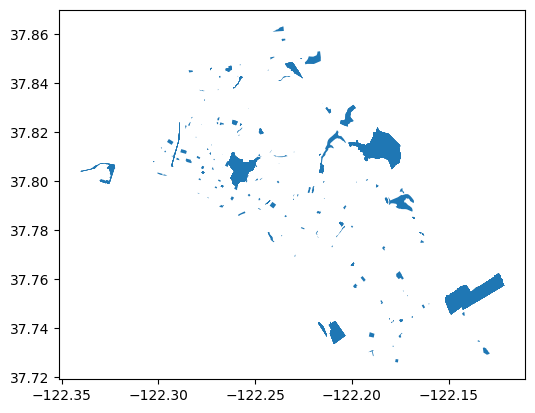

In [ ]:
merged_2.plot()

Some quick analyses of amenities

In [ ]:
#amenities_per_park = merged_2.groupby('parks_and_recreation_facilities').size().reset_index(name='count')
amenities_per_park = merged_2[['name', 'amenity']].groupby('name').count().reset_index()
amenities_per_park.columns
amenities_per_park.sort_values('amenity', ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


name  amenity
64                                   Lakeside Park       70
60                                   Knowland Park       44
61                                Lafayette Square       27
56                             Joaquin Miller Park       20
31                                     Dimond Park       16
..                                             ...      ...
20                        Chabot Recreation Center        0
21     City Slicker Farms - West Oakland Farm Park        0
75                            McClymonds Mini-Park        0
74                                    Maxwell Park        0
17  Carter Gilmore Sports Complex (Greenman Field)        0

[129 rows x 2 columns]

In [ ]:
amenity_counts = amenities_per_park.sort_values(by='amenity', ascending=False).head(5)
print(amenity_counts)

                   name  amenity
64        Lakeside Park       70
60        Knowland Park       44
61     Lafayette Square       27
56  Joaquin Miller Park       20
31          Dimond Park       16


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
amenities_per_park['amenity'].describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


count    129.000000
mean       2.728682
std        8.122838
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       70.000000
Name: amenity, dtype: float64

In [ ]:
len(amenities_per_park[amenities_per_park['amenity'] > 0])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


54

# Choropleth map



In [ ]:
amenities_per_park

name  amenity
0    14th Street Pocket Park        2
1      25th Street Mini Park        0
2      85th Avenue Mini Park        0
3      88th Avenue Mini Park        0
4             Allendale Park        1
..                       ...      ...
124      William D Wood Park        0
125         Willow Mini Park        0
126          Wilma Chan Park       12
127                 ZO POPOS        0
128          de Fremery Park        1

[129 rows x 2 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

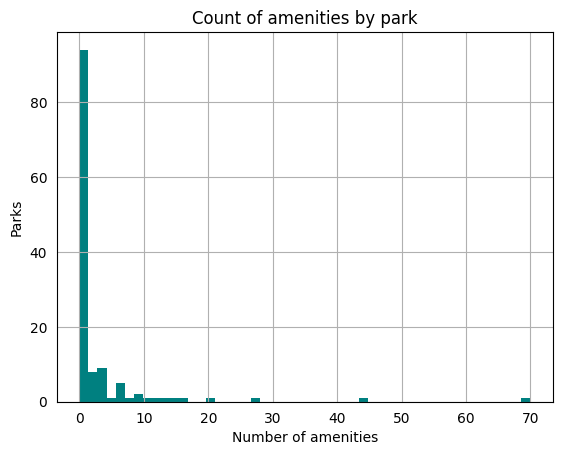

In [ ]:
#count of amenities by park
amenities_per_park.hist(bins=50, color='teal')

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


plt.xlabel('Number of amenities')
plt.ylabel('Parks')
plt.title('Count of amenities by park')
plt.show()


In [ ]:
parks_with_count = parks_w.merge(amenities_per_park, how = 'left', on = 'name')
len(parks_with_count[parks_with_count['name'].isnull() == True])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


30

In [ ]:
parks_with_count.groupby('amenity').count()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


geometry  name  leisure
amenity                         
0.0            79    79       79
1.0            19    19       19
2.0             8     8        8
3.0             5     5        5
4.0             4     4        4
5.0             1     1        1
6.0             5     5        5
7.0             1     1        1
9.0             2     2        2
10.0            1     1        1
12.0            1     1        1
13.0            1     1        1
14.0            1     1        1
16.0            1     1        1
20.0            1     1        1
27.0            1     1        1
44.0            1     1        1
70.0            1     1        1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


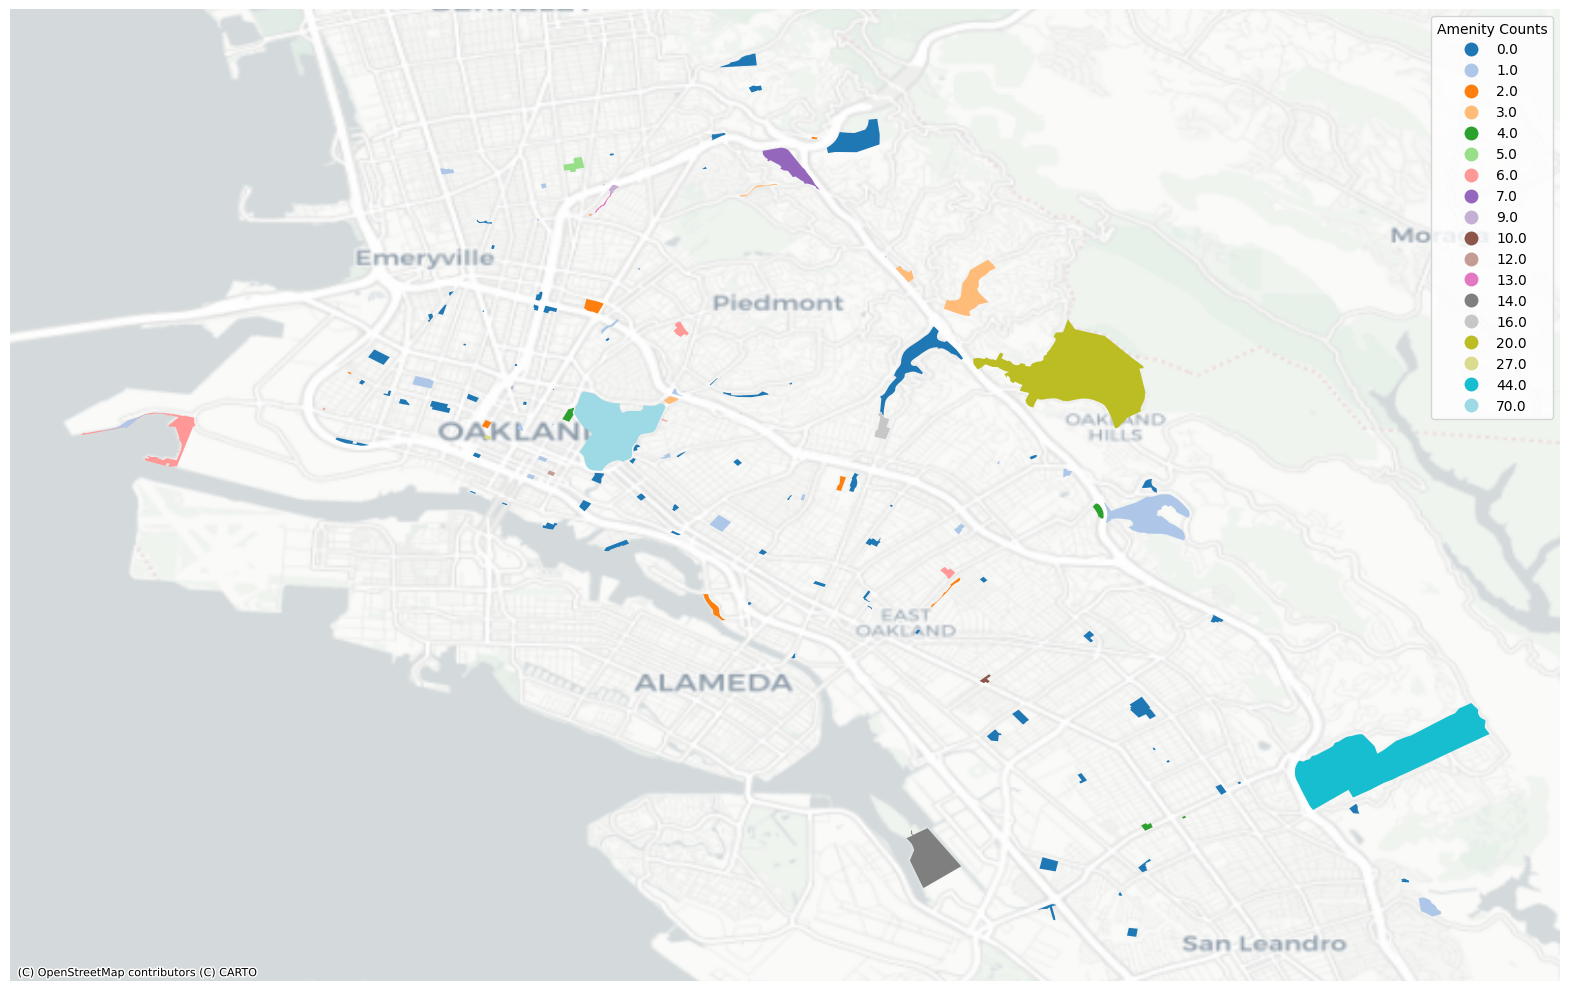

In [ ]:
#palette = sns.color_palette("husl", len(parks_with_count['amenity'].unique()))

legend_title = "Amenity Counts"
fig, ax = plt.subplots(figsize = (20, 30))
parks_with_count.plot(column = 'amenity', ax = ax, legend=True, categorical = True, cmap = 'tab20',legend_kwds={'title': legend_title})
ax.axis('off')
cx.add_basemap(
    ax,
    crs = parks_with_count.crs.to_string(),
    source = cx.providers.CartoDB.Positron
)
plt.show()
#amenities_per_park.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


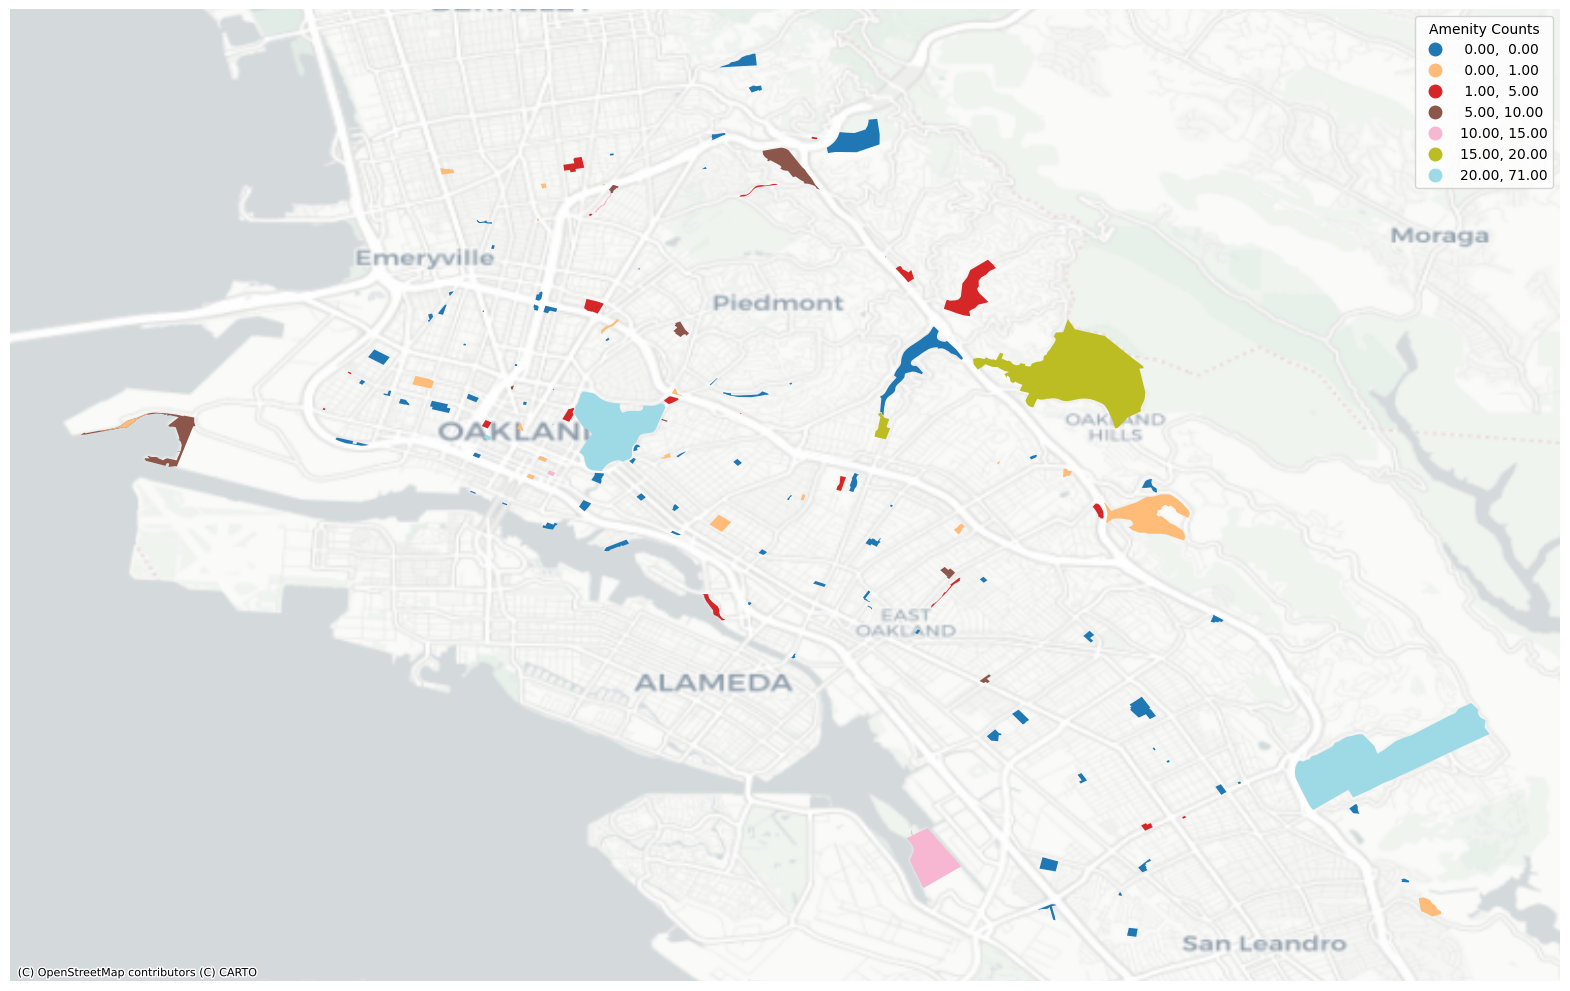

In [ ]:
#this shows buckets in the legend


legend_title = "Amenity Counts"
fig, ax = plt.subplots(figsize = (20, 30))
parks_with_count.plot(column = 'amenity', ax = ax, legend=True, scheme = "userdefined", classification_kwds = {'bins': [0, 1, 5, 10, 15, 20, 71]}, cmap = 'tab20',legend_kwds={'title': legend_title})
ax.axis('off')
cx.add_basemap(
    ax,
    crs = parks_with_count.crs.to_string(),
    source = cx.providers.CartoDB.Positron
)
plt.show()
#amenities_per_park.head()

# **Yelp reviews code**

In [ ]:
api_key = 'eXQ08iO7JgnrHZVxn66FvyAmeC3HxEsV0X2qXjNdjcPYBhgtxh2nQ5DXdC-XOjjtl4eB_Oq-MBdNCQ-77kx_px1ttwANJOVmGr2bJIe_EEnGVpOFoUmGyvwTyRXpZXYx'
headers = {
    'Authorization': f'Bearer {api_key}',
}

endpoint_url_parks_again = "https://api.yelp.com/v3/businesses/search?location=Oakland&categories=parks"
response_parks_again = requests.get(endpoint_url_parks_again, headers=headers)

if response_parks_again.status_code == 200:
    parks_data = response_parks_again.json()
    parks_df = pd.json_normalize(parks_data, 'businesses')

    parks_df = parks_df[parks_df['location.city'] == 'Oakland']

    #reviews for each park
    for index, row in parks_df.iterrows():
        park_id = row['id']
        endpoint_url_reviews = f"https://api.yelp.com/v3/businesses/{park_id}/reviews"
        response_reviews = requests.get(endpoint_url_reviews, headers=headers)

        if response_reviews.status_code == 200:
            reviews_data = response_reviews.json()
            reviews_df = pd.json_normalize(reviews_data['reviews'])
            reviews_text = ' '.join(reviews_df['text'])
            parks_df.at[index, 'reviews'] = reviews_text
        else:
            print(f"Error retrieving reviews for park ID: {park_id}")
else:
    print("Error retrieving park information:", response_parks.status_code)

print(parks_df.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                       id                                             alias  \
0  9vmPjuRuNf2jYSdS0szEuw                     redwood-regional-park-oakland   
1  bt3mS_fhHWj4K-RJa1nXtQ                              lake-merritt-oakland   
2  3kn4EwG8TlpY0aw2kBfxDA              morcom-municipal-rose-garden-oakland   
3  uvgHd2HlGHcNBsnqZT0Klg                       joaquin-miller-park-oakland   
4  uWsuv9oyWZYFFPhNYmXXGA  robert-sibley-volcanic-regional-preserve-oakland   

                                       name  \
0                     Redwood Regional Park   
1                              Lake Merritt   
2              Morcom Municipal Rose Garden   
3                       Joaquin Miller Park   
4  Robert Sibley Volcanic Regional Preserve   

                                           image_url  is_closed  \
0  https://s3-media2.fl.yelpcdn.com/bphoto/OTaC3K...      False   
1  https://s3-media2.fl.yelpcdn.com/bphoto/nGMGOM...      False   
2  https://s3-media2.fl.yelpcdn.com/bphot

In [ ]:
#response_parks_again.json

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
parks_df.describe()
#parks_df['name_right'].median()

review_count     rating     distance  coordinates.latitude  \
count     12.000000  12.000000    12.000000             12.000000   
mean     197.666667   4.508333  4705.053080             37.821582   
std      202.226845   0.137895  2333.173386              0.021038   
min       31.000000   4.300000   959.466391             37.796871   
25%       73.000000   4.400000  2234.866572             37.806101   
50%      118.500000   4.500000  5556.783235             37.812741   
75%      195.500000   4.625000  6452.660655             37.843975   
max      630.000000   4.700000  7235.135635             37.856760   

       coordinates.longitude  
count              12.000000  
mean             -122.229223  
std                 0.046363  
min              -122.322973  
25%              -122.257339  
50%              -122.238503  
75%              -122.192792  
max              -122.162963

In [ ]:
#no filler words

reviews = parks_df['reviews']

all_reviews = ' '.join(reviews)

words = all_reviews.lower().split()

# list of filler to remove
filler_words = ['the', 'in', 'and', 'to', 'of', 'a', 'is', 'it', 'for', 'that',
                'with', 'on', 'at', 'as','this','i','there','we','my','when','are',
                "it's",'an','here','was','even','not','about','but','have','up','one',
                'been','be','they','no','the...','you','of...','had','come']

# filter out filler
filtered_words = [word for word in words if word not in filler_words]


word_freq_df = pd.DataFrame(filtered_words, columns=['word'])
word_freq_df['count'] = 1
word_freq = word_freq_df.groupby('word').count().reset_index()

sorted_word_freq = word_freq.sort_values(by='count', ascending=False)

most_common_words = sorted_word_freq.head(10)
print(most_common_words)

         word  count
172      hike      9
211      lake      7
286      park      7
45        bay      6
302     place      6
233      love      5
396     those      5
410    trails      5
291   parking      5
325  regional      4


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

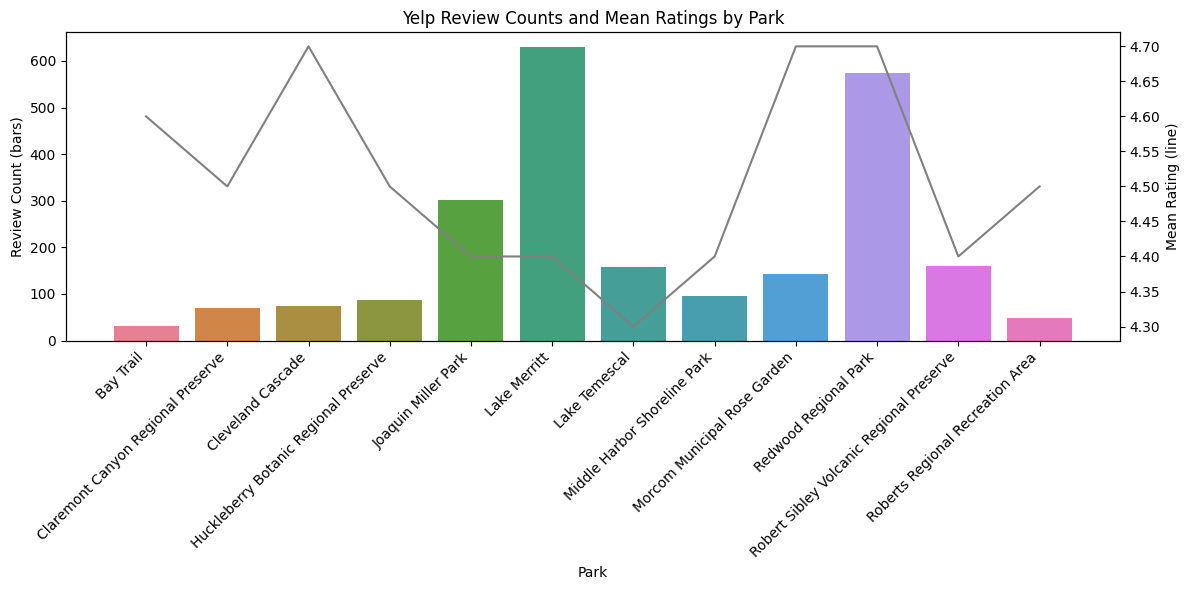

In [ ]:
#Review counts and mean ratings by park

colors = sns.color_palette("husl", 12)

grouped_data = parks_df.groupby('name').agg({'rating': 'mean', 'review_count': 'sum'}).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

for i, park in enumerate(grouped_data['name']):
    sns.barplot(x='name', y='review_count', data=grouped_data[grouped_data['name'] == park], ax=ax1, color=colors[i])

ax1.set_ylabel('Review Count (bars)')

ax2 = ax1.twinx()

sns.lineplot(data=grouped_data, x='name', y='rating', ax=ax2, color='grey')
ax2.set_ylabel('Mean Rating (line)')

ax1.set_xlabel('Park')
ax1.set_title('Yelp Review Counts and Mean Ratings by Park')

plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


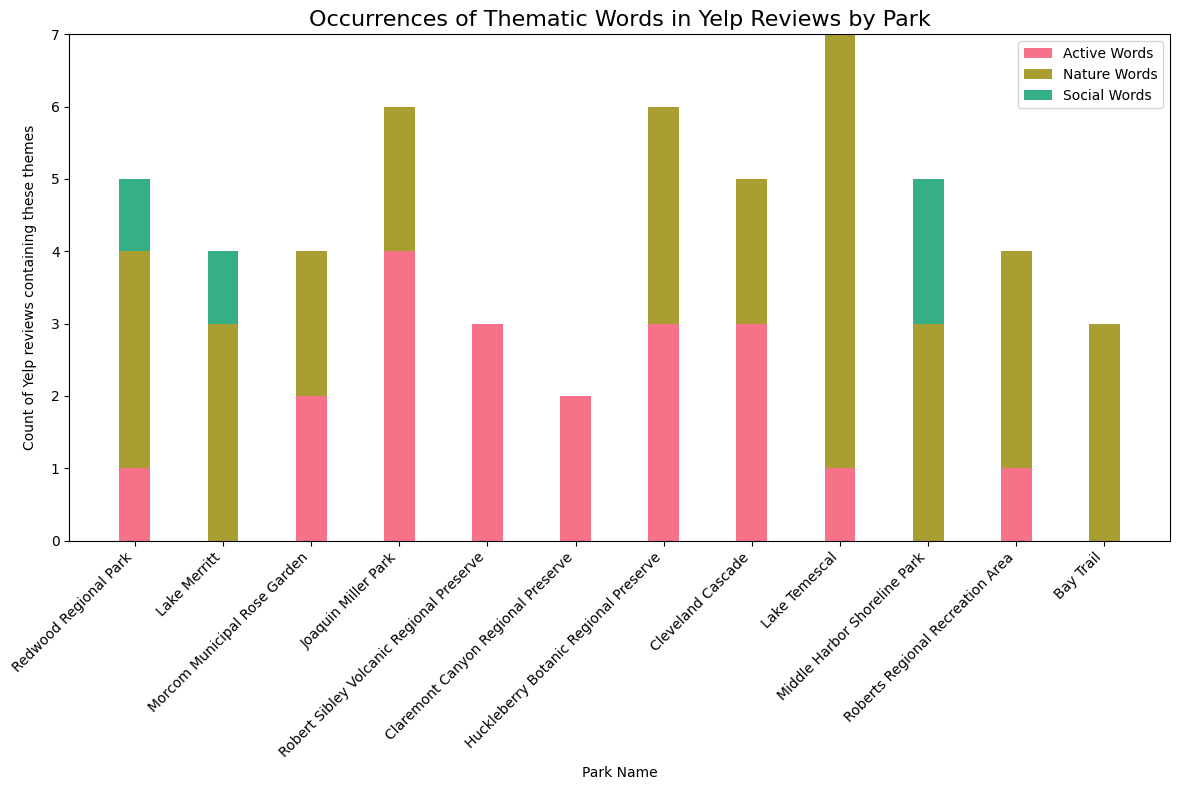

In [ ]:

palette = sns.color_palette("husl", len(parks_with_count['amenity'].unique()))

parks = parks_df['name'].unique()

active_words = ['hike', 'walk', 'run','hiking',
               'walking','running','exercise','workout']

#bike, playing, biking, hikes,exercising,working out,work out, fitness not mentioned after running so removed

nature_words = ['nature', 'green', 'tree', 'park', 'forest', 'trail', 'garden', 'scenic', 'wildlife',
                'lake', 'pond', 'river', 'stream', 'ocean', 'mountain', 'hill', 'landscape', 'lush',
                'vegetation','flower','flowers','bloom','blooms','wildflowers','wildflower','animals',
                'animal','insect','insects','bird','birds','bay','wetland','view','trees','shade']

social_words = ['picnic','game','games','picnicking','music','concert',"farmer's market",
                  'market',"farmers market",'hang','hang out','hangout','chill','vibe',
               'party','birthday','celebrate','celebration','friends','friend',
               'play','musical']

#no one talks about weather so that was removed

word_count_active = {}
word_count_nature = {}
word_count_social={}

# Loop through each park
for park in parks:

    park_reviews = parks_df[parks_df['name'] == park]['reviews']

    all_reviews = ' '.join(park_reviews)

    words = all_reviews.lower().split()

    word_count_active[park] = sum(words.count(word) for word in active_words)
    word_count_nature[park] = sum(words.count(word) for word in nature_words)
    word_count_social[park]=sum(words.count(word) for word in social_words)

fig, ax = plt.subplots(figsize=(12, 8))

# Stacked bar plot
bar_width = 0.35
parks_list = list(parks)
active_values = [word_count_active[park] for park in parks_list]
nature_values = [word_count_nature[park] for park in parks_list]
social_values = [word_count_social[park] for park in parks_list]

ax.bar(parks_list, active_values, bar_width, color=palette[0], label='Active Words')
ax.bar(parks_list, nature_values, bar_width, color=palette[4], bottom=active_values, label='Nature Words')
ax.bar(parks_list, social_values, bar_width, color=palette[8], bottom=[sum(x) for x in zip(active_values, nature_values)], label='Social Words')

ax.set_title("Occurrences of Thematic Words in Yelp Reviews by Park", fontsize=16)
ax.set_xlabel("Park Name")
ax.set_ylabel("Count of Yelp reviews containing these themes", labelpad=10)

plt.xticks(rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

#Demographics and priority neighborhoods based on SES

In [ ]:
endpoint_url_pri = "https://data.oaklandca.gov/resource/nrd7-jph4.json"
response_pri = requests.get(endpoint_url_pri)
results_pri = response_pri.text
print(type(results_pri))
print(results_pri[:500])

<class 'str'>
[{"name":"Oakland","tractce":"408200","namelsad":"Census Tract 4082","geography":"Census Tract 4082, Alameda County, California","race_total":"4489","one_race":"3997","one_race_w":"1011","black_or_a":"2297","amindianan":"91","amindian_1":"0","amindian_2":"0","amindian_3":"0","amindian_4":"0","asian":"217","asian_indi":"10","asian_chin":"37","asian_fili":"63","asian_japa":"27","asian_kore":"0","asian_viet":"5","asian_othe":"75","native_hi_":"71","native_hi1":"27","native_h_1":"0","native_h_2":"0"


In [ ]:
priority_df = pd.read_json(response_pri.text)
priority_df.columns = priority_df.columns.str.upper()
priority_df["TRACTCE"] = priority_df["TRACTCE"].astype(int)
priority_df.head()

NAME  TRACTCE           NAMELSAD  \
0  Oakland   408200  Census Tract 4082   
1  Oakland   408400  Census Tract 4084   
2  Oakland   408500  Census Tract 4085   
3  Oakland   408600  Census Tract 4086   
4  Oakland   408700  Census Tract 4087   

                                       GEOGRAPHY  RACE_TOTAL  ONE_RACE  \
0  Census Tract 4082, Alameda County, California        4489      3997   
1  Census Tract 4084, Alameda County, California        3310      3231   
2  Census Tract 4085, Alameda County, California        5932      5591   
3  Census Tract 4086, Alameda County, California        6680      6220   
4  Census Tract 4087, Alameda County, California        7734      7153   

   ONE_RACE_W  BLACK_OR_A  AMINDIANAN  AMINDIAN_1  ...  RENT_RATIO  \
0        1011        2297          91           0  ...    1.505364   
1         904        1219          40           0  ...    1.677661   
2         530        2309          74           0  ...    1.702723   
3        1375        2133          28           0  ...    1.793799   
4        1619        3368           0           0  ...    1.537382   

   PCT_DISABI  DISABILITY  PCT_SENIOR  SENIORS_RA  PCT_SINGLE  SINGLE_PAR  \
0    0.137418    1.190219    0.112254    0.842506    0.349624    1.844262   
1    0.108260    0.937676    0.095908    0.719821    0.369655    1.949925   
2    0.089417    0.774471    0.070604    0.529909    0.297639    1.570042   
3    0.095819    0.829914    0.084555    0.634614    0.445166    2.348244   
4    0.125269    1.084992    0.122772    0.921445    0.225335    1.188639   

   PCT_EDUCAT  EDUCATION            PLANNING_2  
0    0.606627   1.103415    East Oakland Hills  
1    0.846657   1.540014  Central/East Oakland  
2    0.863981   1.571525  Central/East Oakland  
3    0.810224   1.473746  Central/East Oakland  
4    0.817676   1.487301  Central/East Oakland  

[5 rows x 76 columns]

## some playing with tract visualizations

<Axes: >

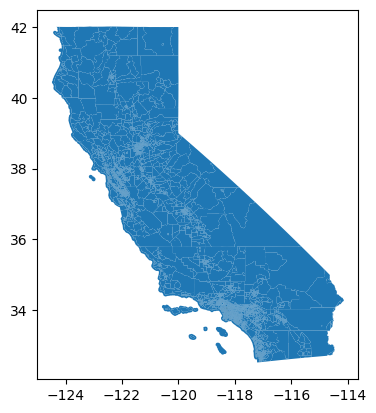

In [ ]:
#using 2019 since Oakland's priority census tracts are from those geographies
census_url = 'https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_06_tract.zip'
tracts = gpd.read_file(census_url)
tracts.plot()

In [ ]:
tracts["TRACTCE"] = tracts["TRACTCE"].astype(int)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tracts_filtered = tracts[tracts['COUNTYFP'] == '001']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
tracts_filtered.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 361 entries, 22 to 8055
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   361 non-null    object  
 1   COUNTYFP  361 non-null    object  
 2   TRACTCE   361 non-null    int64   
 3   GEOID     361 non-null    object  
 4   NAME      361 non-null    object  
 5   NAMELSAD  361 non-null    object  
 6   MTFCC     361 non-null    object  
 7   FUNCSTAT  361 non-null    object  
 8   ALAND     361 non-null    int64   
 9   AWATER    361 non-null    int64   
 10  INTPTLAT  361 non-null    object  
 11  INTPTLON  361 non-null    object  
 12  geometry  361 non-null    geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 39.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
priority_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NAME  TRACTCE           NAMELSAD  \
0  Oakland   408200  Census Tract 4082   
1  Oakland   408400  Census Tract 4084   
2  Oakland   408500  Census Tract 4085   
3  Oakland   408600  Census Tract 4086   
4  Oakland   408700  Census Tract 4087   

                                       GEOGRAPHY  RACE_TOTAL  ONE_RACE  \
0  Census Tract 4082, Alameda County, California        4489      3997   
1  Census Tract 4084, Alameda County, California        3310      3231   
2  Census Tract 4085, Alameda County, California        5932      5591   
3  Census Tract 4086, Alameda County, California        6680      6220   
4  Census Tract 4087, Alameda County, California        7734      7153   

   ONE_RACE_W  BLACK_OR_A  AMINDIANAN  AMINDIAN_1  ...  RENT_RATIO  \
0        1011        2297          91           0  ...    1.505364   
1         904        1219          40           0  ...    1.677661   
2         530        2309          74           0  ...    1.702723   
3        1375        2133          28           0  ...    1.793799   
4        1619        3368           0           0  ...    1.537382   

   PCT_DISABI  DISABILITY  PCT_SENIOR  SENIORS_RA  PCT_SINGLE  SINGLE_PAR  \
0    0.137418    1.190219    0.112254    0.842506    0.349624    1.844262   
1    0.108260    0.937676    0.095908    0.719821    0.369655    1.949925   
2    0.089417    0.774471    0.070604    0.529909    0.297639    1.570042   
3    0.095819    0.829914    0.084555    0.634614    0.445166    2.348244   
4    0.125269    1.084992    0.122772    0.921445    0.225335    1.188639   

   PCT_EDUCAT  EDUCATION            PLANNING_2  
0    0.606627   1.103415    East Oakland Hills  
1    0.846657   1.540014  Central/East Oakland  
2    0.863981   1.571525  Central/East Oakland  
3    0.810224   1.473746  Central/East Oakland  
4    0.817676   1.487301  Central/East Oakland  

[5 rows x 76 columns]

In [ ]:
tracts_filtered.loc[:, 'TRACTCE'] = tracts_filtered['TRACTCE'].astype(priority_df['TRACTCE'].dtype)

priority_w_tracts = pd.merge(tracts_filtered, priority_df, on="TRACTCE", how='right')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
priority_df.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['NAME', 'TRACTCE', 'NAMELSAD', 'GEOGRAPHY', 'RACE_TOTAL', 'ONE_RACE',
       'ONE_RACE_W', 'BLACK_OR_A', 'AMINDIANAN', 'AMINDIAN_1', 'AMINDIAN_2',
       'AMINDIAN_3', 'AMINDIAN_4', 'ASIAN', 'ASIAN_INDI', 'ASIAN_CHIN',
       'ASIAN_FILI', 'ASIAN_JAPA', 'ASIAN_KORE', 'ASIAN_VIET', 'ASIAN_OTHE',
       'NATIVE_HI_', 'NATIVE_HI1', 'NATIVE_H_1', 'NATIVE_H_2', 'NATIVE_H_3',
       'OTHER', 'TWO_OR_MOR', 'WHITE_AND_', 'WHITE_AND1', 'WHITE_AN_1',
       'BLACK_AND_', 'HISPLAT_TO', 'HISPLAT__1', 'HISPLAT__2', 'HISPLAT__3',
       'HISPLAT__4', 'HISPLAT__5', 'HISPLAT_NO', 'HISPLAT_WH', 'HISPLAT_BL',
       'HISPLAT_AM', 'HISPLAT_AS', 'HISPLAT_NA', 'HISPLAT_OT', 'HISPLAT_2O',
       'HISPLAT__6', 'HISPLAT_2_', 'HISPLAT_HO', 'VOTERS_OVE', 'VOTERS_O_1',
       'VOTERS_O_2', 'SHAPE_AR_1', 'SHAPE_LEN', 'TRACTNUMB', 'TRACT',
       'TOTAL_POPU', 'FINAL_SCOR', 'FINAL_SC_1', 'PLANNING_1', 'FINAL_SC_2',
       'PCT_POC', 'POC_RATIO', 'PCT_LOW_IN', 'LOW_INCOME', 'PCT_RENT',
       'RENT_RATIO', '

In [ ]:
priority_w_tracts.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME_x', 'NAMELSAD_x',
       'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', 'NAME_y', 'NAMELSAD_y', 'GEOGRAPHY', 'RACE_TOTAL',
       'ONE_RACE', 'ONE_RACE_W', 'BLACK_OR_A', 'AMINDIANAN', 'AMINDIAN_1',
       'AMINDIAN_2', 'AMINDIAN_3', 'AMINDIAN_4', 'ASIAN', 'ASIAN_INDI',
       'ASIAN_CHIN', 'ASIAN_FILI', 'ASIAN_JAPA', 'ASIAN_KORE', 'ASIAN_VIET',
       'ASIAN_OTHE', 'NATIVE_HI_', 'NATIVE_HI1', 'NATIVE_H_1', 'NATIVE_H_2',
       'NATIVE_H_3', 'OTHER', 'TWO_OR_MOR', 'WHITE_AND_', 'WHITE_AND1',
       'WHITE_AN_1', 'BLACK_AND_', 'HISPLAT_TO', 'HISPLAT__1', 'HISPLAT__2',
       'HISPLAT__3', 'HISPLAT__4', 'HISPLAT__5', 'HISPLAT_NO', 'HISPLAT_WH',
       'HISPLAT_BL', 'HISPLAT_AM', 'HISPLAT_AS', 'HISPLAT_NA', 'HISPLAT_OT',
       'HISPLAT_2O', 'HISPLAT__6', 'HISPLAT_2_', 'HISPLAT_HO', 'VOTERS_OVE',
       'VOTERS_O_1', 'VOTERS_O_2', 'SHAPE_AR_1', 'SHAPE_LEN', 'TRACTNUMB',
       'TRACT', 'TOTAL_POPU',

In [ ]:
priority_w_tracts.FINAL_SC_1 = pd.Categorical(priority_w_tracts.FINAL_SC_1, categories = ['Highest', 'High', 'Medium', 'Low', 'Lowest'], ordered = True)
priority_w_tracts[['FINAL_SCOR', 'FINAL_SC_1', 'FINAL_SC_2']]


FINAL_SCOR FINAL_SC_1  FINAL_SC_2
0      1.221922       High    1.243235
1      1.381192    Highest    1.406430
2      1.237160       High    1.259926
3      1.389463    Highest    1.415547
4      1.235480       High    1.256232
..          ...        ...         ...
112    0.918951        Low    0.931537
113    1.024297     Medium    1.038250
114    0.534049     Lowest    0.537373
115    0.795822        Low    0.804140
116    0.000000        NaN    0.000000

[117 rows x 3 columns]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


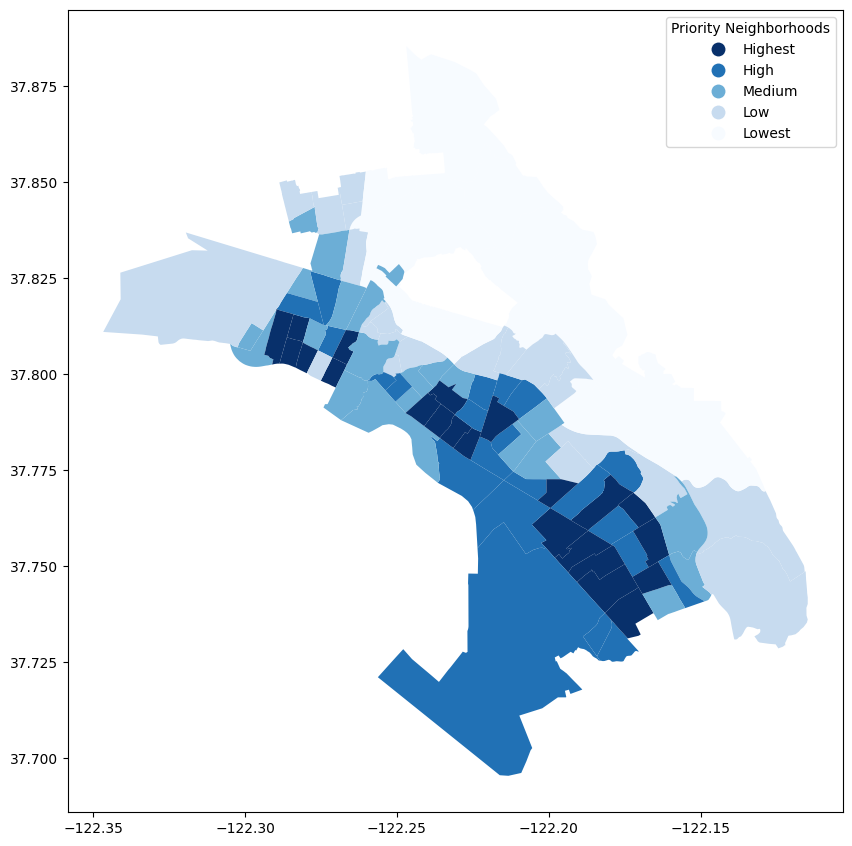

In [ ]:
fig, ax = plt.subplots(figsize = (10, 20))
priority_w_tracts.plot(ax = ax, column = 'FINAL_SC_1', categorical = True, legend = True,  legend_kwds = {'loc': 'upper right', 'title': 'Priority Neighborhoods'},cmap = 'Blues_r')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


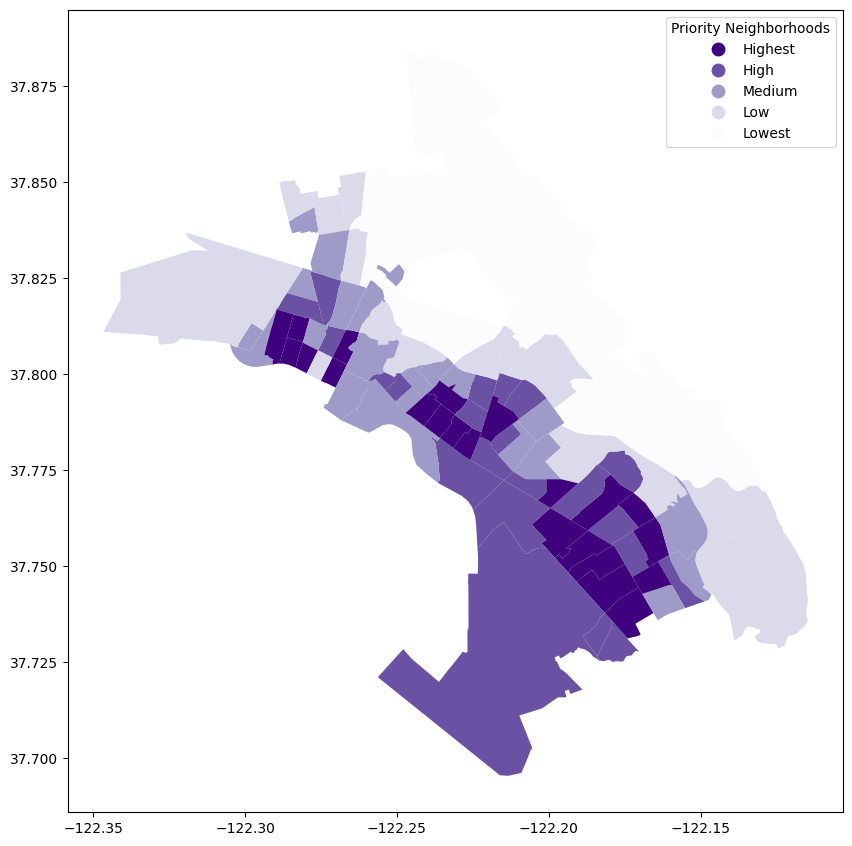

In [ ]:
ig, ax = plt.subplots(figsize = (10, 20))
priority_w_tracts.plot(ax = ax, column = 'FINAL_SC_1', categorical = True, legend = True,  legend_kwds = {'loc': 'upper right', 'title': 'Priority Neighborhoods'},cmap = 'Purples_r')
plt.show()

## Plot Priority Neighborhoods and Parks with number of amenities

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


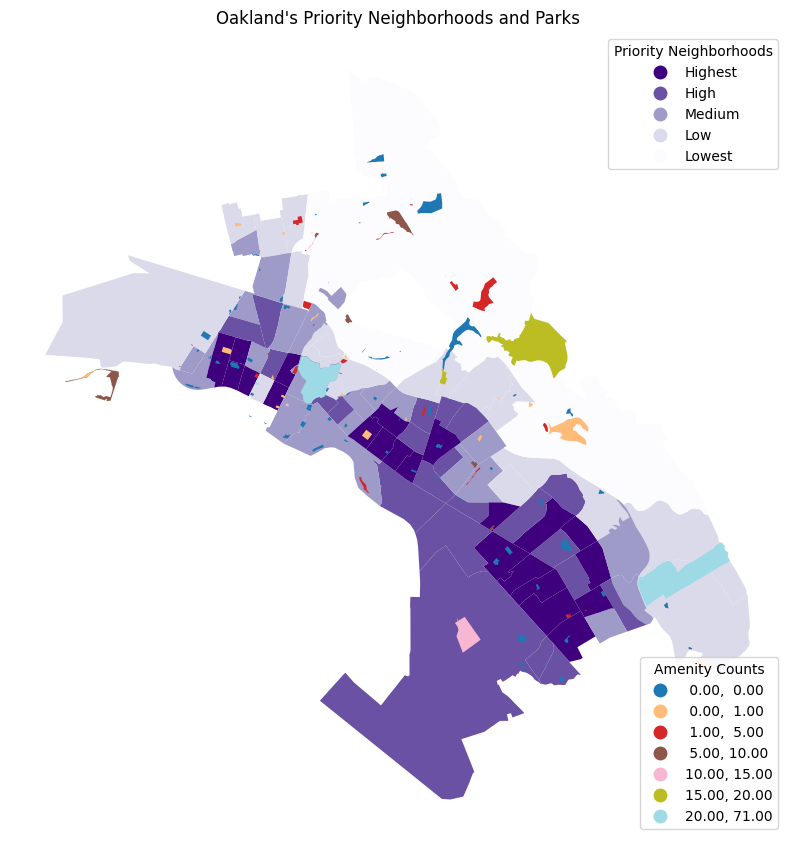

In [ ]:
legend_title = "Amenity Counts"
fig, ax = plt.subplots(figsize = (10, 20))
priority_w_tracts.plot(ax = ax, column = 'FINAL_SC_1', categorical = True, legend = True,  legend_kwds = {'loc': 'upper right', 'title': 'Priority Neighborhoods'},cmap = 'Purples_r')
leg1 = ax.get_legend()
parks_with_count.plot(column = 'amenity', ax = ax, legend= True, scheme = "userdefined", classification_kwds = {'bins': [0, 1, 5, 10, 15, 20, 71]}, cmap = 'tab20',legend_kwds={'title': legend_title, 'loc': 'lower right'})
ax.axis('off')
ax.set_title("Oakland's Priority Neighborhoods and Parks")
ax.add_artist(leg1)

plt.show()

## Spatial Analysis

In [ ]:
## Add Google Reviews to Parks_With_Counts
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
# Path on Melody's Drive
csv_path = '/content/drive/My Drive/parks_google_ratings.csv'
#csv_path = '/content/drive/My Drive/UCB/S24/255/Copy of parks_google_ratings.csv'

google_ratings = pd.read_csv(csv_path, encoding='latin-1')
google_ratings = google_ratings[['osm_name', 'google_rating', 'google_rating_count']]
google_ratings = google_ratings[google_ratings['osm_name'].notna()]
#Dropping duplicates
google_ratings.loc[1, 'google_rating'] = 4.3
google_ratings.loc[1, 'google_rating_count'] = 208
google_ratings[google_ratings['osm_name'].isin(['César Chávez Park', 'Grove Shafter Park', 'Henry J. Kaiser Memorial Park','Verdese Carter Park'])]
google_ratings.drop_duplicates('osm_name', keep = 'first', inplace = True)
google_ratings

osm_name  google_rating  google_rating_count
0                         Fruitvale Plaza            NaN                    0
1                     Verdese Carter Park            4.3                  208
2      San Leandro Bay Regional Shoreline            NaN                    0
3             Allendale Recreation Center            4.3                  100
4                    McCrea Memorial Park            4.4                   96
..                                    ...            ...                  ...
166                      Little Frog Park            NaN                    0
169    Vicente Canyon Hillside Open Space            NaN                    0
170                        Glen Echo Park            5.0                    1
171         Glenn Daniel King Estate Park            4.5                   56
172  Judge John Sutter Regional Shoreline            4.8                   24

[138 rows x 3 columns]

In [ ]:
parks_with_count = parks_with_count[parks_with_count['name'].notna()]
parks_with_count_reviews = parks_with_count.merge(google_ratings, left_on = "name", right_on = "osm_name", how = 'left')
parks_with_count_reviews

geometry  \
0    POLYGON ((-122.26449 37.80775, -122.26447 37.8...   
1    POLYGON ((-122.26157 37.82508, -122.26050 37.8...   
2    POLYGON ((-122.23420 37.84808, -122.23414 37.8...   
3    POLYGON ((-122.27179 37.80586, -122.27134 37.8...   
4    POLYGON ((-122.26516 37.84592, -122.26346 37.8...   
..                                                 ...   
128  POLYGON ((-122.23762 37.80736, -122.23774 37.8...   
129  POLYGON ((-122.17895 37.73248, -122.17863 37.7...   
130  POLYGON ((-122.25781 37.84162, -122.25760 37.8...   
131  POLYGON ((-122.26122 37.83815, -122.26091 37.8...   
132  POLYGON ((-122.23591 37.85715, -122.23475 37.8...   

                                   name leisure  amenity  \
0                             Snow Park    park      4.0   
1                         Mosswood Park    park      2.0   
2     Temescal Regional Recreation Area    park      7.0   
3                  Frank H. Ogawa Plaza    park      1.0   
4                          Bushrod Park    park      5.0   
..                                  ...     ...      ...   
128                    Warren Hook Park    park      2.0   
129                  Tyrone Carney Park    park      0.0   
130               Hardy Park & Dog Park    park      9.0   
131                    Little Frog Park    park      3.0   
132  Vicente Canyon Hillside Open Space    park      0.0   

                               osm_name  google_rating  google_rating_count  
0                             Snow Park            4.4                  809  
1                         Mosswood Park            4.1                  757  
2     Temescal Regional Recreation Area            4.6                 1210  
3                  Frank H. Ogawa Plaza            4.2                  730  
4                          Bushrod Park            4.4                  412  
..                                  ...            ...                  ...  
128                    Warren Hook Park            NaN                    0  
129                  Tyrone Carney Park            4.4                   18  
130               Hardy Park & Dog Park            3.7                    9  
131                    Little Frog Park            NaN                    0  
132  Vicente Canyon Hillside Open Space            NaN                    0  

[133 rows x 7 columns]

In [ ]:
# Drop parks with NAN as name
joined_data = gpd.sjoin(priority_w_tracts, parks_with_count_reviews, how='left') #, op='contains')

joined_data = joined_data[['TRACTCE', 'FINAL_SCOR', 'FINAL_SC_1', 'name', 'amenity', 'google_rating', 'google_rating_count']]
joined_data

<ipython-input-69-88d36fc2b3a2>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  joined_data = gpd.sjoin(priority_w_tracts, parks_with_count_reviews, how='left') #, op='contains')


TRACTCE  FINAL_SCOR FINAL_SC_1                                name  \
0     408200    1.221922       High                                 NaN   
1     408400    1.381192    Highest                                 NaN   
2     408500    1.237160       High                   Arroyo Viejo Park   
3     408600    1.389463    Highest                                 NaN   
4     408700    1.235480       High                      Concordia Park   
..       ...         ...        ...                                 ...   
113   403501    1.024297     Medium                       Oak Glen Park   
114   404600    0.534049     Lowest                 Joaquin Miller Park   
114   404600    0.534049     Lowest                Shepherd Canyon Park   
115   406700    0.795822        Low                  Peralta Creek Park   
116   423800    0.000000        NaN  Vicente Canyon Hillside Open Space   

     amenity  google_rating  google_rating_count  
0        NaN            NaN                  NaN  
1        NaN            NaN                  NaN  
2        0.0            4.7                 32.0  
3        NaN            NaN                  NaN  
4        0.0            3.8                183.0  
..       ...            ...                  ...  
113      1.0            4.3                 92.0  
114     20.0            4.7               2492.0  
114      3.0            4.4                171.0  
115      1.0            4.1                 14.0  
116      0.0            NaN                  0.0  

[178 rows x 7 columns]

In [ ]:
len(joined_data['name'].unique())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


130

In [ ]:
len(parks_with_count.dropna())

133

In [ ]:
park_counts_by_tract = priority_w_tracts[['TRACTCE', 'FINAL_SCOR', 'FINAL_SC_1']].sort_values(['TRACTCE']).reset_index().copy()
counts = joined_data.groupby(['TRACTCE'], dropna = False).agg({'name':'count', 'amenity':'sum', 'google_rating':'mean', 'google_rating_count':'sum'}).reset_index()

park_counts_by_tract[['Park_Count', 'Amenities_Num', 'Average_Rating', 'Total_Reviews']] = counts[['name', 'amenity', 'google_rating', 'google_rating_count']]
park_counts_by_tract.drop(columns = 'index', inplace = True)
park_counts_by_tract

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


TRACTCE  FINAL_SCOR FINAL_SC_1  Park_Count  Amenities_Num  \
0     400100    0.563008     Lowest           2            0.0   
1     400200    0.471342     Lowest           2           22.0   
2     400300    0.663113     Lowest           3           25.0   
3     400400    0.674897     Lowest           2            1.0   
4     400500    0.706111        Low           1            5.0   
..       ...         ...        ...         ...            ...   
112   426200    0.478979        NaN           1            6.0   
113   981900    0.000000        NaN           2            7.0   
114   982000    0.000000        NaN           0            0.0   
115   983200    0.000000        NaN           2            0.0   
116   990000    0.000000        NaN           0            0.0   

     Average_Rating  Total_Reviews  
0              4.60           61.0  
1              4.05          458.0  
2              4.05          458.0  
3              4.20           71.0  
4              4.40          412.0  
..              ...            ...  
112            4.70          889.0  
113            4.40         1371.0  
114             NaN            0.0  
115             NaN            0.0  
116             NaN            0.0  

[117 rows x 7 columns]

In [ ]:
## Number of Parks and Amenities by Priority Neighborhood
priority_parks=park_counts_by_tract.groupby('FINAL_SC_1')[['Park_Count', 'Amenities_Num','Average_Rating', 'Total_Reviews']].agg({'Park_Count':'sum', 'Amenities_Num':'sum', 'Average_Rating':'mean', 'Total_Reviews':'sum'})
priority_parks

Park_Count  Amenities_Num  Average_Rating  Total_Reviews
FINAL_SC_1                                                          
Highest             21           24.0        4.038462         3153.0
High                26           96.0        4.072619         3719.0
Medium              33          100.0        4.181176         4577.0
Low                 28          175.0        4.336979         8376.0
Lowest              35          127.0        4.367708        10744.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


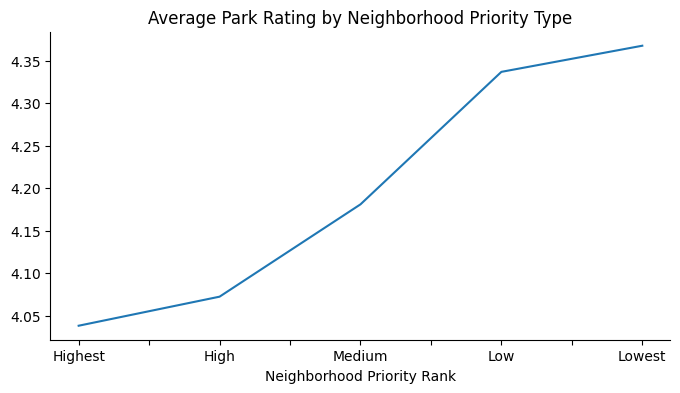

In [ ]:
# @title Average Park Rating by Neighborhood Priority Type

priority_parks['Average_Rating'].plot(kind='line', figsize=(8, 4), title='Average Park Rating by Neighborhood Priority Type')
plt.xlabel("Neighborhood Priority Rank")
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


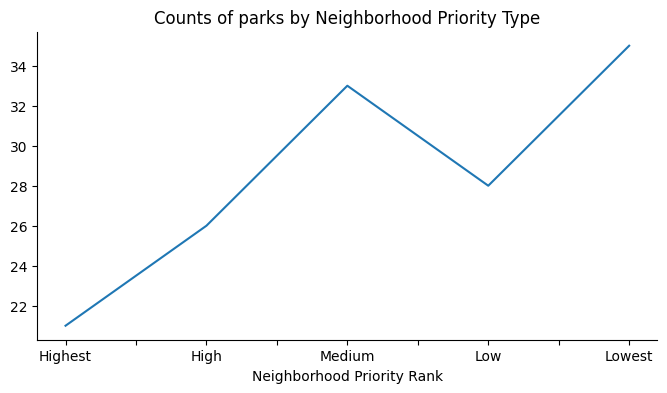

In [ ]:
# @title Park_Count

from matplotlib import pyplot as plt
priority_parks['Park_Count'].plot(kind='line', figsize=(8, 4), title='Counts of parks by Neighborhood Priority Type')
plt.xlabel("Neighborhood Priority Rank")
plt.gca().spines[['top', 'right']].set_visible(False)

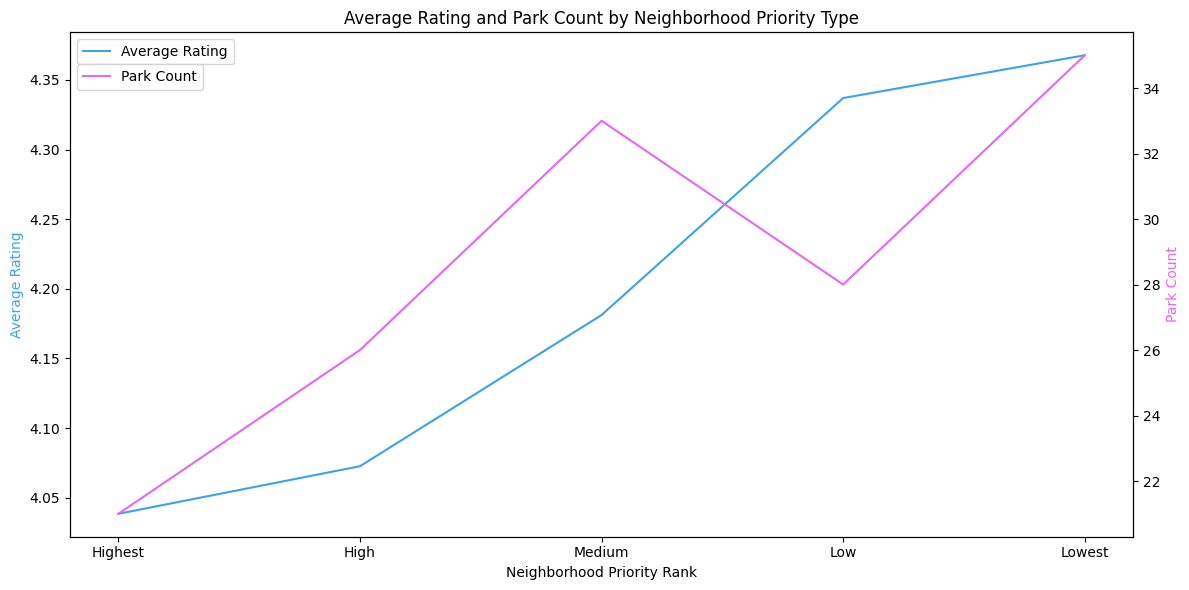

In [ ]:
colors = sns.color_palette("husl", 12)

grouped_data_1 = priority_parks.groupby('FINAL_SC_1')[['Average_Rating', 'Park_Count']].mean().reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

sns.lineplot(data=grouped_data_1, x='FINAL_SC_1', y='Average_Rating', ax=ax1, color=colors[8], label='Average Rating')
ax1.set_ylabel('Average Rating', color=colors[8])

ax2 = ax1.twinx()

sns.lineplot(data=grouped_data_1, x='FINAL_SC_1', y='Park_Count', ax=ax2, color=colors[10], label='Park Count')
ax2.set_ylabel('Park Count', color=colors[10])

ax1.set_xlabel('Neighborhood Priority Rank')
ax1.set_title('Average Rating and Park Count by Neighborhood Priority Type')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1))
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))

plt.tight_layout()
plt.show()



In [ ]:
priority_parks

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Park_Count  Amenities_Num  Average_Rating  Total_Reviews
FINAL_SC_1                                                          
Highest             21           24.0        4.038462         3153.0
High                26           96.0        4.072619         3719.0
Medium              33          100.0        4.181176         4577.0
Low                 28          175.0        4.336979         8376.0
Lowest              35          127.0        4.367708        10744.0

####Plots

<ipython-input-78-c8109e1399c2>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FINAL_SC_1', y='Park_Count', data=park_counts_by_tract, estimator=sum, ci=None)


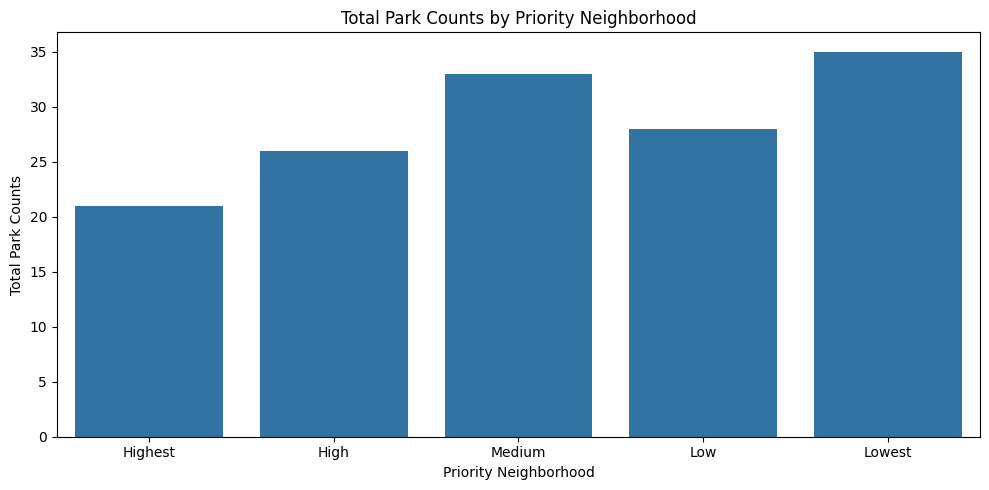

<ipython-input-78-c8109e1399c2>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FINAL_SC_1', y='Amenities_Num', data=park_counts_by_tract, estimator=sum, ci=None)


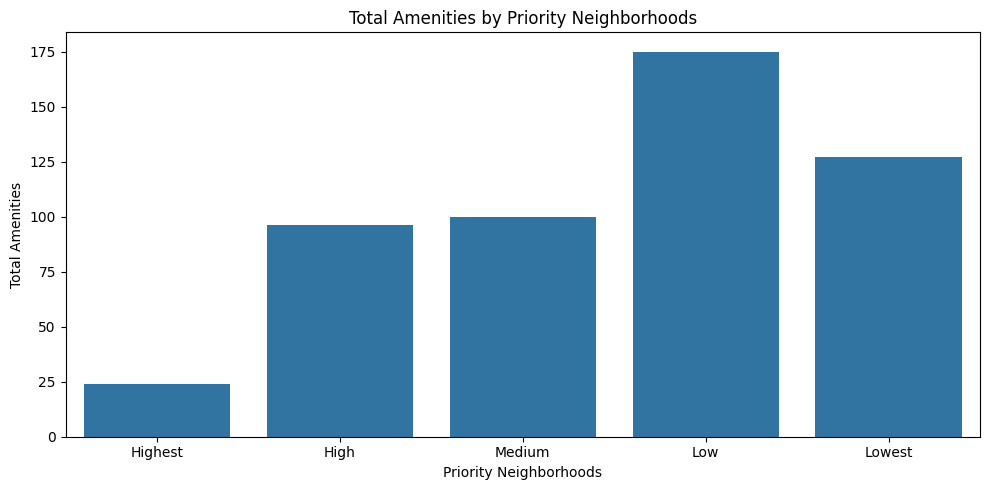

In [ ]:
colors = sns.color_palette("husl", 12)

plt.figure(figsize=(10, 5))
sns.barplot(x='FINAL_SC_1', y='Park_Count', data=park_counts_by_tract, estimator=sum, ci=None)
plt.title('Total Park Counts by Priority Neighborhood')
plt.xlabel('Priority Neighborhood')
plt.ylabel('Total Park Counts')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='FINAL_SC_1', y='Amenities_Num', data=park_counts_by_tract, estimator=sum, ci=None)
plt.title('Total Amenities by Priority Neighborhoods')
plt.xlabel('Priority Neighborhoods')
plt.ylabel('Total Amenities')
plt.tight_layout()
plt.show()


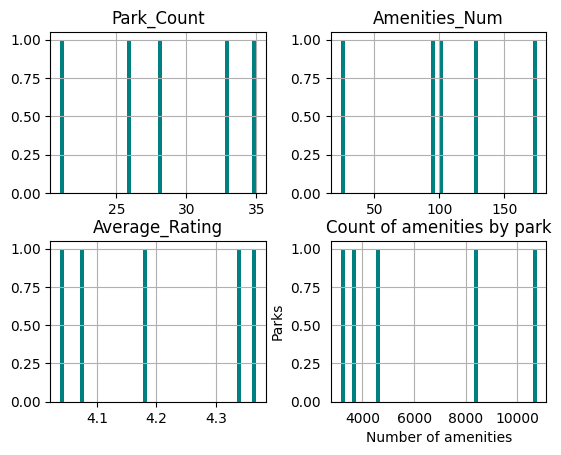

In [ ]:
priority_parks.hist(bins=50, color='teal')

plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False)


plt.xlabel('Number of amenities')
plt.ylabel('Parks')
plt.title('Count of amenities by park')
plt.show()

In [ ]:
priority_w_tracts[['TRACTCE', 'FINAL_SCOR', 'FINAL_SC_1']].sort_values(['TRACTCE'])

TRACTCE  FINAL_SCOR FINAL_SC_1
86    400100    0.563008     Lowest
77    400200    0.471342     Lowest
74    400300    0.663113     Lowest
88    400400    0.674897     Lowest
63    400500    0.706111        Low
..       ...         ...        ...
25    426200    0.478979        NaN
111   981900    0.000000        NaN
11    982000    0.000000        NaN
107   983200    0.000000        NaN
110   990000    0.000000        NaN

[117 rows x 3 columns]

In [ ]:
joined_data.sort_values(['TRACTCE'])

TRACTCE  FINAL_SCOR FINAL_SC_1                                name  \
86    400100    0.563008     Lowest  Vicente Canyon Hillside Open Space   
86    400100    0.563008     Lowest                    John Garber Park   
77    400200    0.471342     Lowest        Rockridge-Temescal Greenbelt   
77    400200    0.471342     Lowest               Hardy Park & Dog Park   
74    400300    0.663113     Lowest                    Little Frog Park   
..       ...         ...        ...                                 ...   
111   981900    0.000000        NaN                       Portview Park   
11    982000    0.000000        NaN                                 NaN   
107   983200    0.000000        NaN                         Ferry Green   
107   983200    0.000000        NaN                         Marina Lawn   
110   990000    0.000000        NaN                                 NaN   

     amenity  google_rating  google_rating_count  
86       0.0            NaN                  0.0  
86       0.0            4.6                 61.0  
77      13.0            4.4                449.0  
77       9.0            3.7                  9.0  
74       3.0            NaN                  0.0  
..       ...            ...                  ...  
111      1.0            4.4                308.0  
11       NaN            NaN                  NaN  
107      0.0            NaN                  0.0  
107      0.0            NaN                  0.0  
110      NaN            NaN                  NaN  

[178 rows x 7 columns]

In [ ]:
#how many parks per census tract
park_counts_by_tract.describe()

TRACTCE  FINAL_SCOR  Park_Count  Amenities_Num  Average_Rating  \
count     117.000000  117.000000  117.000000     117.000000       78.000000   
mean   425731.025641    0.953634    1.273504       4.572650        4.217585   
std    105626.137995    0.361637    1.118989      11.841858        0.331980   
min    400100.000000    0.000000    0.000000       0.000000        3.000000   
25%    403501.000000    0.700643    1.000000       0.000000        4.012500   
50%    405800.000000    1.009134    1.000000       0.000000        4.300000   
75%    408300.000000    1.229295    2.000000       2.000000        4.400000   
max    990000.000000    1.551866    6.000000      74.000000        5.000000   

       Total_Reviews  
count     117.000000  
mean      280.589744  
std       516.408889  
min         0.000000  
25%         0.000000  
50%        84.000000  
75%       282.000000  
max      2663.000000

#Laurel linear reg

In [ ]:
park_am_for_lr =pd.crosstab(filtered_park_amenities['name_right'], filtered_park_amenities['amenity'])
park_am_for_lr

amenity                            bbq  bench  bicycle_parking  \
name_right                                                       
14th Street Pocket Park              0      0                0   
Allendale Park                       0      0                0   
Arrowhead Park                       0      6                0   
Ayala Park                           0      1                0   
Bertha Port Park                     0      6                0   
Bishop Floyd L. Begin Plaza          0      5                1   
Brookdale Park                       1      0                0   
Bushrod Park                         0      4                0   
Central Reservoir Recreation Area    0      0                0   
Chabot Park                          0      0                0   
Courtland Creek Park                 0      1                0   
Dimond Park                          2     10                0   
Dover Street Edible Park             0      0                0   
Eastshore Park                       0      0                1   
Elmhurst Park                        0      1                2   
F.M. Smith Park                      0      0                0   
Frank H. Ogawa Plaza                 0      0                0   
Gateway                              0      0                0   
Golden Gate Park                     0      0                0   
Hardy Park & Dog Park                0      2                2   
Harrison Square                      0      0                0   
Helen McGregor Plaza Park            0      0                0   
Holly Mini Park                      0      4                0   
Joaquin Miller Park                  0      2                1   
Knowland Park                        0     22                1   
Lafayette Square                     0     14                1   
Lakeshore Park                       0      6                0   
Lakeside Park                        2     45                3   
Leona Heights Park                   0      1                0   
Lincoln Square Park                  0      0                0   
Little Frog Park                     0      2                1   
Manzanita Park                       0      0                0   
McCrea Park                          0      4                0   
Middle Harbor Shoreline Park         1      1                0   
Montclair Playground                 0      1                0   
Morcom Amphitheatre of Roses         0      2                0   
Mosswood Park                        0      0                0   
Oak Glen Park                        0      0                0   
Ostrander Park                       0      2                0   
Peralta Creek Park                   0      1                0   
Portview Park                        0      0                0   
Preservation Park                    0      0                0   
Rainbow Recreation Center            0      4                3   
Redwood Heights Recreation Center    0      0                0   
Rockridge-Temescal Greenbelt         0      5                3   
San Antonio Park                     0      0                0   
Shepherd Canyon Park                 0      1                0   
Snow Park                            0      2                0   
Splash Pad Park                      0      0                1   
Temescal Regional Recreation Area    0      0                0   
Union Point Park                     0      0                0   
Warren Hook Park                     0      2                0   
Wilma Chan Park                      0     11                0   
de Fremery Park                      0      0                0   

amenity                            community_centre  drinking_water  shelter  \
name_right                                                                     
14th Street Pocket Park                           0               0        2   
Allendale Park                                    1            

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/UCB/S24/255/Copy of parks_google_ratings.csv', 'r', encoding='latin-1') as csvfile:
    csv_reader = csv.reader(csvfile)
    for row in csv_reader:
        print(row)
        import csv

['osmid', 'gnis:feature_id', 'osm_name', 'google_name', 'oakland_name', 'google_rating', 'google_rating_count', 'osm_duplicate']
['358817319', '1670748', 'Fruitvale Plaza', 'NaN', 'NaN', 'NaN', '0', '']
['358817992', '1676081', 'Verdese Carter Park', 'NaN', 'Verdese Carter Park', 'NaN', '0', '']
['358819333', '1692784', 'San Leandro Bay Regional Shoreline', 'NaN', 'NaN', 'NaN', '0', '']
['358819648', '1693011', 'Allendale Recreation Center', 'Allendale Recreation Center', 'NaN', '4.3', '100', '']
['358819686', '1693040', 'McCrea Memorial Park', 'McCrea Memorial Park', 'McCrea Park', '4.4', '96', 'Yes']
['358851442', '1961817', 'North Oakland Recreation Center', 'North Oakland Recreation Center', 'NaN', '4.2', '15', '']
['4238749796', 'NaN', 'Skyline Serpentine Prairie', 'Serpentine Prairie', 'NaN', '5', '3', '']
['5809540217', 'NaN', 'Henry J. Kaiser Memorial Park', 'Henry J. Kaiser Memorial Park', 'Henery J. Kaiser Memorial Park (Remember Them: Champions For Humanity Monument)', '4.4'

In [ ]:
csv_file_path = '/content/drive/My Drive/UCB/S24/255/Copy of parks_google_ratings.csv'

winnie_ratings = pd.read_csv(csv_file_path, encoding='latin-1')

print(winnie_ratings)

          osmid  gnis:feature_id                              osm_name  \
0     358817319        1670748.0                       Fruitvale Plaza   
1     358817992        1676081.0                   Verdese Carter Park   
2     358819333        1692784.0    San Leandro Bay Regional Shoreline   
3     358819648        1693011.0           Allendale Recreation Center   
4     358819686        1693040.0                  McCrea Memorial Park   
..          ...              ...                                   ...   
168  1185885884              NaN                                   NaN   
169  1268787322              NaN    Vicente Canyon Hillside Open Space   
170     6704593              NaN                        Glen Echo Park   
171     8524766              NaN         Glenn Daniel King Estate Park   
172    13905279              NaN  Judge John Sutter Regional Shoreline   

                              google_name         oakland_name  google_rating  \
0                             

In [ ]:
google_ratings = winnie_ratings[['osm_name','google_name','google_rating','google_rating_count']]
google_ratings

osm_name  \
0                         Fruitvale Plaza   
1                     Verdese Carter Park   
2      San Leandro Bay Regional Shoreline   
3             Allendale Recreation Center   
4                    McCrea Memorial Park   
..                                    ...   
168                                   NaN   
169    Vicente Canyon Hillside Open Space   
170                        Glen Echo Park   
171         Glenn Daniel King Estate Park   
172  Judge John Sutter Regional Shoreline   

                              google_name  google_rating  google_rating_count  
0                                     NaN            NaN                    0  
1                                     NaN            NaN                    0  
2                                     NaN            NaN                    0  
3             Allendale Recreation Center            4.3                  100  
4                    McCrea Memorial Park            4.4                   96  
..                                    ...            ...                  ...  
168                                   NaN            NaN                    0  
169    Vicente Canyon Hillside Open Space            NaN                    0  
170                        Glen Echo Park            5.0                    1  
171           King Estate Open Space Park            4.5                   56  
172  Judge John Sutter Regional Shoreline            4.8                   24  

[173 rows x 4 columns]

In [ ]:
google_ratings = google_ratings[google_ratings['google_name'].notnull() &
                                google_ratings['google_rating'].notnull() &
                                google_ratings['google_rating_count'].notnull()]
print(google_ratings)

                                 osm_name  \
3             Allendale Recreation Center   
4                    McCrea Memorial Park   
5         North Oakland Recreation Center   
6              Skyline Serpentine Prairie   
7           Henry J. Kaiser Memorial Park   
..                                    ...   
164                    Tyrone Carney Park   
165                 Hardy Park & Dog Park   
170                        Glen Echo Park   
171         Glenn Daniel King Estate Park   
172  Judge John Sutter Regional Shoreline   

                              google_name  google_rating  google_rating_count  
3             Allendale Recreation Center            4.3                  100  
4                    McCrea Memorial Park            4.4                   96  
5         North Oakland Recreation Center            4.2                   15  
6                      Serpentine Prairie            5.0                    3  
7           Henry J. Kaiser Memorial Park            4.4   

In [ ]:
yelp_ratings = parks_df[['name','review_count','rating']]

yelp_ratings

name  review_count  rating
0                      Redwood Regional Park           574     4.7
1                               Lake Merritt           630     4.4
2               Morcom Municipal Rose Garden           142     4.7
3                        Joaquin Miller Park           302     4.4
4   Robert Sibley Volcanic Regional Preserve           160     4.4
5         Claremont Canyon Regional Preserve            70     4.5
6                          Cleveland Cascade            74     4.7
7      Huckleberry Botanic Regional Preserve            88     4.5
8                              Lake Temescal           158     4.3
10                                 Bay Trail            31     4.6
11              Middle Harbor Shoreline Park            95     4.4
13          Roberts Regional Recreation Area            48     4.5

In [ ]:
name_replacements = {
    'Morcom Municipal Rose Garden':'Morcom Rose Garden',
    'Redwood Regional Park':'Redwood Heights Regional Park',
    'Lake Temescal':'Temescal Regional Park'
}

yelp_ratings['name'] = yelp_ratings['name'].replace(name_replacements)

print(yelp_ratings)

                                        name  review_count  rating
0              Redwood Heights Regional Park           574     4.7
1                               Lake Merritt           630     4.4
2                         Morcom Rose Garden           142     4.7
3                        Joaquin Miller Park           302     4.4
4   Robert Sibley Volcanic Regional Preserve           160     4.4
5         Claremont Canyon Regional Preserve            70     4.5
6                          Cleveland Cascade            74     4.7
7      Huckleberry Botanic Regional Preserve            88     4.5
8                     Temescal Regional Park           158     4.3
10                                 Bay Trail            31     4.6
11              Middle Harbor Shoreline Park            95     4.4
13          Roberts Regional Recreation Area            48     4.5


In [ ]:
#yelp rating linreg

yelp_ratings_amenity_merge = pd.merge(yelp_ratings, park_am_for_lr, left_on='name', right_on='name_right', how='inner')

yelp_ratings_amenity_merge['adjusted_rating'] = yelp_ratings_amenity_merge['rating'] / np.sqrt(yelp_ratings_amenity_merge['review_count'])

X = yelp_ratings_amenity_merge[['bench','bicycle_parking','community_centre','drinking_water','bbq','shelter','table','theatre','toilets','waste_basket']]
y = yelp_ratings_amenity_merge['adjusted_rating']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X, y)

print("Coefficients:", regression_model.coef_)
print("Intercept:", regression_model.intercept_)

print("R-squared:", regression_model.score(X, y))


Coefficients: [-0.00260841 -0.00260841  0.         -0.02086726  0.00260841  0.
  0.         -0.00521681 -0.00521681 -0.00260841]
Intercept: 0.4879481718770755
R-squared: 1.0


In [ ]:
#google rating lr

google_ratings_amenity_merge = pd.merge(google_ratings, park_am_for_lr, left_on='google_name', right_on='name_right', how='inner')

X = google_ratings_amenity_merge[['bbq','bench',	'bicycle_parking','community_centre',	'drinking_water',	'shelter',	'table',	'theatre',	'toilets',	'waste_basket']]
y = google_ratings_amenity_merge['google_rating'].fillna(0)

model = LinearRegression()
model.fit(X, y)

regression_model = LinearRegression()
regression_model.fit(X, y)

print("Coefficients:", regression_model.coef_)
print("Intercept:", regression_model.intercept_)

print("R-squared:", regression_model.score(X, y))

Coefficients: [ 1.79619177e-01 -2.02575067e-02  1.09726184e-01 -7.69734554e-02
  3.21747841e-02  4.94188855e-02 -2.42861287e-16  2.54986300e-03
  4.91121966e-02 -3.18651164e-02]
Intercept: 4.168024924690688
R-squared: 0.2567700662663275


In [ ]:
# List of amenities
amenities = ['bbq','bench', 'bicycle_parking', 'community_centre', 'drinking_water', 'shelter', 'table', 'theatre', 'toilets', 'waste_basket']

for amenity in amenities:
    X_ = google_ratings_amenity_merge[[amenity]]

    model = LinearRegression()
    model.fit(X_, y)

    print(f"Amenity: {amenity}")
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R-squared:", model.score(X_, y))
    print()


Amenity: bbq
Coefficients: [0.10328467]
Intercept: 4.244525547445255
R-squared: 0.02487198948587077

Amenity: bench
Coefficients: [0.00808462]
Intercept: 4.234003226614002
R-squared: 0.03998967663970576

Amenity: bicycle_parking
Coefficients: [0.08555276]
Intercept: 4.225879396984924
R-squared: 0.04957575915657264

Amenity: community_centre
Coefficients: [-0.01979167]
Intercept: 4.267708333333332
R-squared: 0.0006399619922848876

Amenity: drinking_water
Coefficients: [0.06333333]
Intercept: 4.176666666666666
R-squared: 0.1791893578398004

Amenity: shelter
Coefficients: [0.15474684]
Intercept: 4.239556962025316
R-squared: 0.06439006342039277

Amenity: table
Coefficients: [0.]
Intercept: 4.264516129032257
R-squared: 0.0

Amenity: theatre
Coefficients: [0.10048077]
Intercept: 4.241826923076922
R-squared: 0.035739415876839487

Amenity: toilets
Coefficients: [0.06167174]
Intercept: 4.188918507235338
R-squared: 0.16997513540823617

Amenity: waste_basket
Coefficients: [0.00148699]
Intercept: 

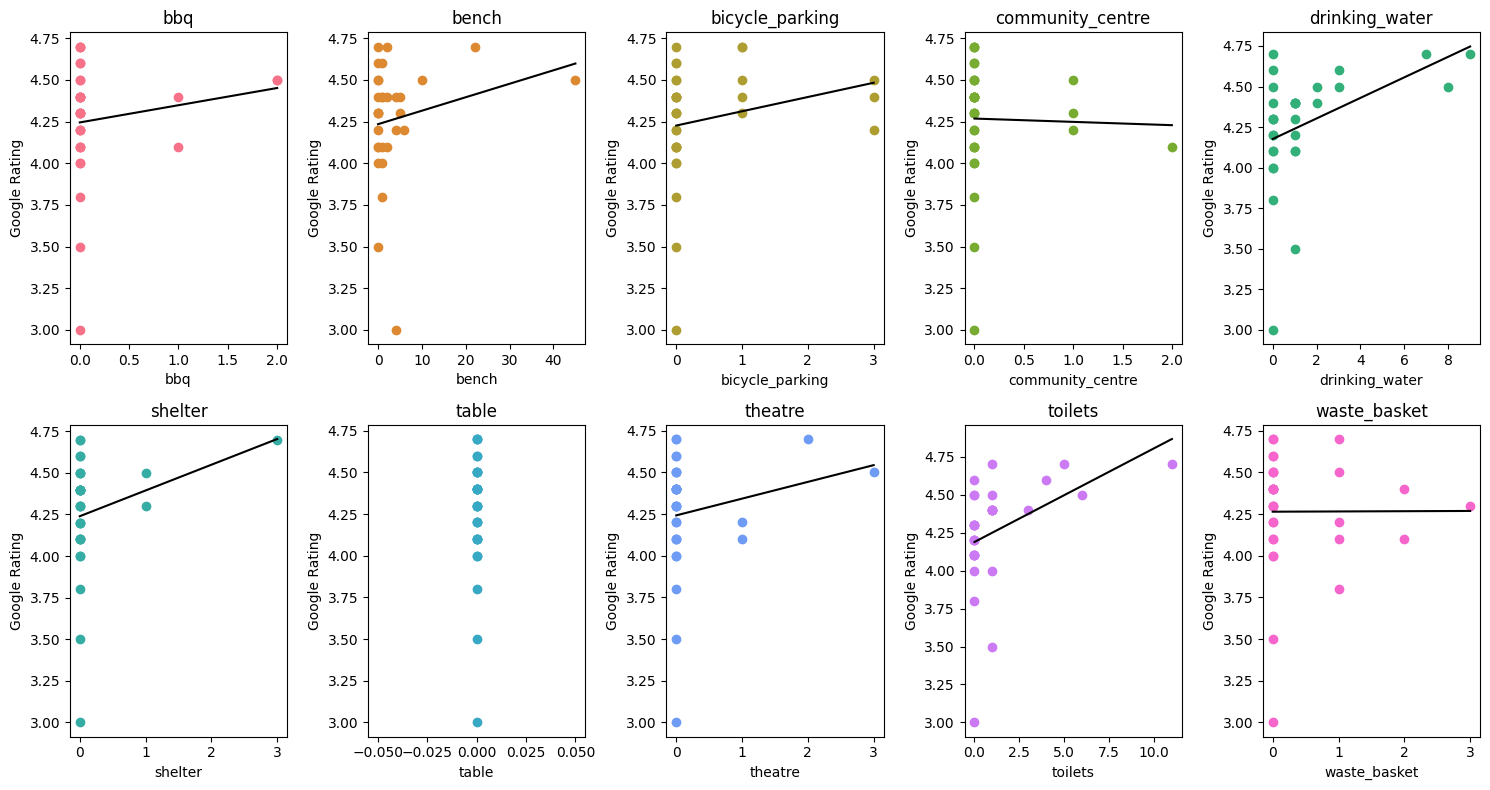

In [ ]:
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

axes_flat = axes.flatten()

palette = sns.color_palette("husl", len(amenities))

for i, amenity in enumerate(amenities):
    X_ = google_ratings_amenity_merge[[amenity]]

    model = LinearRegression()
    model.fit(X_, y)

    axes_flat[i].scatter(X_, y, color=palette[i], label='Actual Data')

    x_values = np.linspace(X_.min(), X_.max(), 100)
    y_values = model.predict(x_values.reshape(-1, 1))
    axes_flat[i].plot(x_values, y_values, color='black', label='Regression Line')

    axes_flat[i].set_title(amenity)

    axes_flat[i].set_xlabel(amenity)
    axes_flat[i].set_ylabel('Google Rating')

plt.tight_layout()

plt.show()

# **Public Transit Proximity from Study Parks**

In [ ]:
# Load OSM network data for Oakland, CA
place = "Oakland, California, USA"
G = ox.graph_from_place(place, network_type='drive')
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
Gp = ox.project_graph(G)

# Obtaining Oakland parks from OSM and dropping nodes, keeping only polygons
tags = {'leisure': 'park'}
allparks = ox.features_from_place(place, tags)
allparks_w = allparks.loc['way'].copy()

KeyboardInterrupt: 

In [ ]:
# Obtaining centroid of each study park's polygon
allparks_w['center'] = allparks_w['geometry']

for i in range(len(allparks_w)):
  allparks_w.iloc[i, 21] = allparks_w.iloc[i, 0].centroid

In [ ]:
# Request POIs within Oakland that are “bus_stops”
bus_tags = {'highway': 'bus_stop'}
pois = ox.features_from_place(place, bus_tags).reset_index()[
    [
        "element_type",
        "osmid",
        "highway",
        "name",
        "route_ref",
        "geometry",
    ]
]

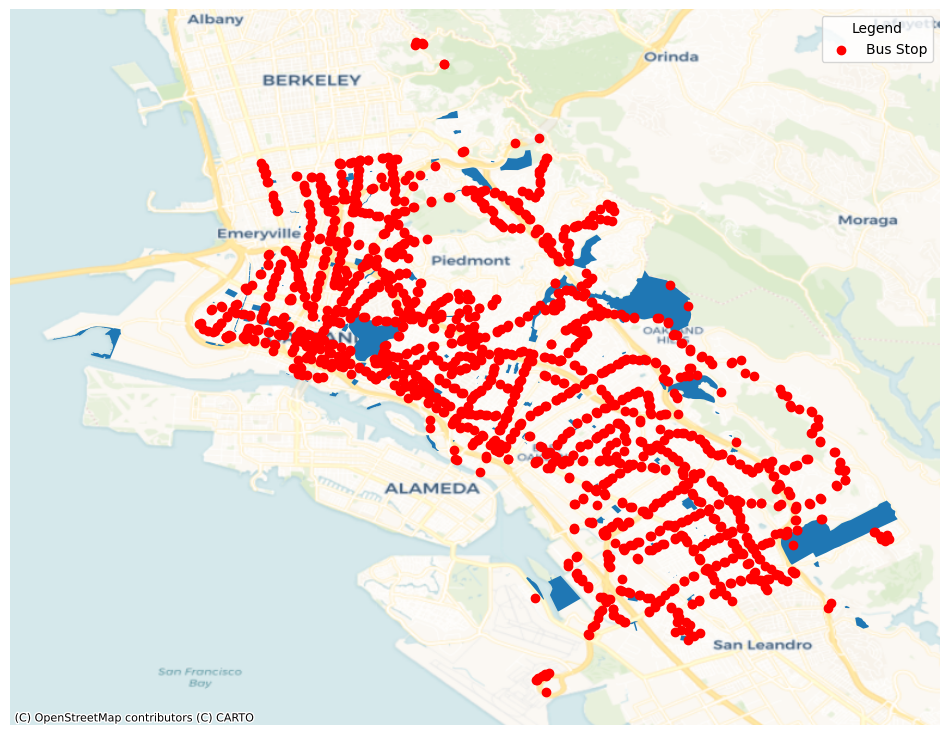

In [ ]:
# Generate a plot which looks at Oakland's bus stops as compared with park locations
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(12, 12))
# Plot parks
allparks_w.plot(ax=ax, marker=".")
# Plot bus stops in red
pois.plot(ax=ax, color="r", label="Bus Stop")

# Add Carto's Voyager basemap
cx.add_basemap(
    ax,
    crs=allparks_w.crs.to_string(),
    source=cx.providers.CartoDB.Voyager,
)
# Remove axes
ax.set_axis_off()

# Add legend
ax.legend(title="Legend")

# Display
plt.show()

In [ ]:
# We need to be able to measure distances in meters. However, our data is originally expressed in degrees
allparks_w.crs
pois.crs

# We need to convert this into a coordinate system that is easier to work with
# Use a projection common for mapping in California, the California Albers projection
allparks_w_albers = allparks_w.to_crs(epsg=3311)
pois_albers = pois.to_crs(epsg=3311)

In [ ]:
# Create the radius of 400 meters around each park
allparks_w_albers["buffer_400m"] = allparks_w_albers.buffer(400)

# Using these, we can count the number of bus stops that are within these areas using a spatial join
# Spatial join, appending attributes from right table to left one
joined = gpd.sjoin(
    # Right table - bus stops
    pois_albers,
    # Left table - parks with the geometry reset from the original
    # points to the 400-meter buffer and selecting only `gnis:feature_id` and `buffer_400m` columns
    allparks_w_albers.set_geometry("buffer_400m")[["gnis:feature_id", "buffer_400m"]],
    # Operation (spatial predicate) to use for the spatial join (`within`)
    op="within",
)

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [ ]:
# Apply a group-by operation, using the park ID, and count how many bus stops each park has within 400 meters of distance
# Group bus stops by park ID (`gnis:feature_id`)
poi_count = (
    joined.groupby(
        "gnis:feature_id"
        # Keep only bus stop id column (`osmid`)
    )[
        "osmid"
        # Count bus stops by park + convert Series into DataFrame
    ]
    .count()
    .to_frame("poi_count")
)
# Print top of the table
poi_count.head()

poi_count
gnis:feature_id           
1661754                 20
1670765                 16
1676001                 24
1676006                 12
1676027                  9

In [ ]:
# We know that missing parks in poi_count do not have any bus stops within 400m
# so we can fill missing values in the column with zeros

parks_w_counts = allparks_w_albers.merge(
    poi_count, left_on="gnis:feature_id", right_index=True
).fillna({"poi_count": 0})

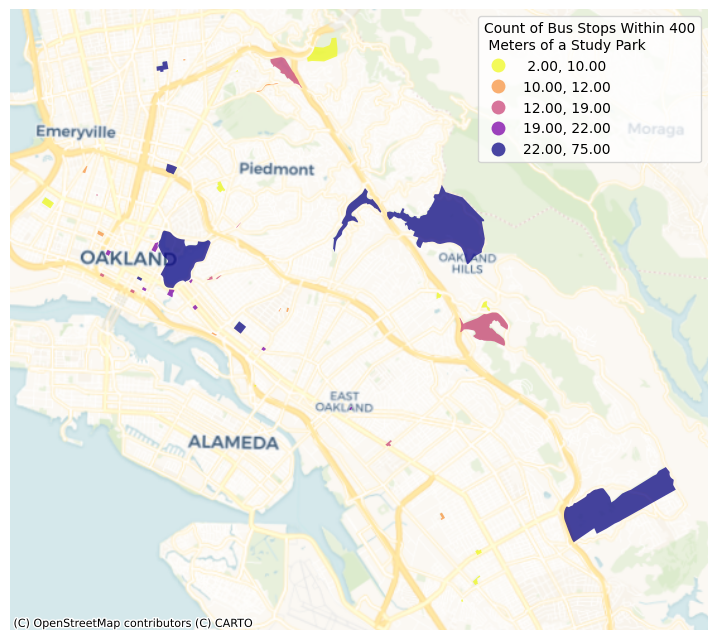

In [ ]:
# We can visualize the distribution of counts to get a sense of how “well-served” parks are arranged over space
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Generate the "plasma" color palette from seaborn
palette = sns.color_palette("plasma", as_cmap=True)
# Reverse the order of colors in the colormap
reversed_palette = list(reversed(palette.colors))
# Create a colormap object from the reversed palette
cmap = ListedColormap(reversed_palette)

# Plot quantile map of number of bus stops for every park
parks_w_counts.plot(
    column="poi_count",
    scheme="quantiles",
    alpha=0.75,
    legend=True,
    legend_kwds={'loc': 'upper right', 'title': 'Count of Bus Stops Within 400\n Meters of a Study Park', 'alignment': 'left'},
    ax=ax,
    cmap = cmap
)
# Add basemap
cx.add_basemap(
    ax,
    crs=allparks_w_albers.crs.to_string(),
    source=cx.providers.CartoDB.Voyager,
)
# Remove axes
ax.set_axis_off();

In [ ]:
# Looking at number of routes served by each bus stop
# Split the routes in the "route_ref" column by semicolons and count the number of routes for each bus stop
pois_albers['routes'] = pois_albers['route_ref']
pois_albers['route_ref'] = pois_albers['route_ref'].astype(str)
for i in range(len(pois_albers)):
  if pois_albers['route_ref'][i] == 'nan':
    pois_albers['routes'][i] = 0
  elif ';' not in pois_albers['route_ref'][i]:
    pois_albers['routes'][i] = 1
  else:
    pois_albers['routes'][i] = len(pois_albers['route_ref'][i].split(';'))

pois_albers.head(5)

<ipython-input-51-bf3616f1a23f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pois_albers['routes'][i] = len(pois_albers['route_ref'][i].split(';'))
<ipython-input-51-bf3616f1a23f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pois_albers['routes'][i] = 1
<ipython-input-51-bf3616f1a23f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pois_albers['routes'][i] = 0


element_type      osmid   highway                                    name  \
0         node  311252257  bus_stop  Thomas L. Berkley Way & Webster Street   
1         node  311252264  bus_stop           Harrison Street & 21st Street   
2         node  311252272  bus_stop          Grand Avenue & Harrison Street   
3         node  444646468  bus_stop                                     NaN   
4         node  454952491  bus_stop          Centennial Drive & Parking Lot   

       route_ref                        geometry routes  
0  33;NL;611;805  POINT (-199199.513 -20730.935)      4  
1     33;611;805  POINT (-198950.069 -20619.380)      3  
2             12  POINT (-198861.348 -20457.958)      1  
3            nan  POINT (-198090.178 -16838.239)      0  
4             65  POINT (-197267.676 -12699.395)      1

In [ ]:
# Spatial join, appending attributes from right table to left one
joined_routes = gpd.sjoin(
    # Right table - bus stops
    pois_albers,
    # Left table - parks with the geometry reset from the original
    # points to the 400-meter buffer and selecting only `gnis:feature_id` and `buffer_400m` columns
    allparks_w_albers.set_geometry("buffer_400m")[["gnis:feature_id", "buffer_400m"]],
    # Operation (spatial predicate) to use for the spatial join (`within`)
    op="within",
)

joined_routes.head()

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


element_type       osmid   highway  \
0           node   311252257  bus_stop   
1           node   311252264  bus_stop   
2           node   311252272  bus_stop   
261         node  5845156169  bus_stop   
264         node  5845156177  bus_stop   

                                       name      route_ref  \
0    Thomas L. Berkley Way & Webster Street  33;NL;611;805   
1             Harrison Street & 21st Street     33;611;805   
2            Grand Avenue & Harrison Street             12   
261            Grand Avenue & Valdez Street      12;33;805   
264  Thomas L. Berkley Way & Webster Street  33;NL;611;805   

                           geometry routes  index_right gnis:feature_id  
0    POINT (-199199.513 -20730.935)      4     22672037         1693069  
1    POINT (-198950.069 -20619.380)      3     22672037         1693069  
2    POINT (-198861.348 -20457.958)      1     22672037         1693069  
261  POINT (-199082.397 -20408.256)      3     22672037         1693069  
264  POINT (-199191.309 -20763.012)      4     22672037         1693069

In [ ]:
# Apply a group-by operation, using the park ID, and count how many bus routes each park is served by within 400 meters of distance
# Group bus routes by park ID (`gnis:feature_id`)
route_count = (
    joined_routes.groupby(
        "gnis:feature_id"
        # Keep only bus stop routes count column (`routes`)
    )[
        "routes"
        # Count routes that serve each park + convert Series into DataFrame
    ]
    .sum()
    .to_frame("route_count")
)
# Print top of the table
route_count.head()

route_count
gnis:feature_id            
1661754                  45
1670765                  39
1676001                  32
1676006                  18
1676027                   9

In [ ]:
# We know that missing parks in route_count do not have any bus routes within 400m
# so we can fill missing values in the column with zeros

parks_w_routes = allparks_w_albers.merge(
    route_count, left_on="gnis:feature_id", right_index=True
).fillna({"route_count": 0})

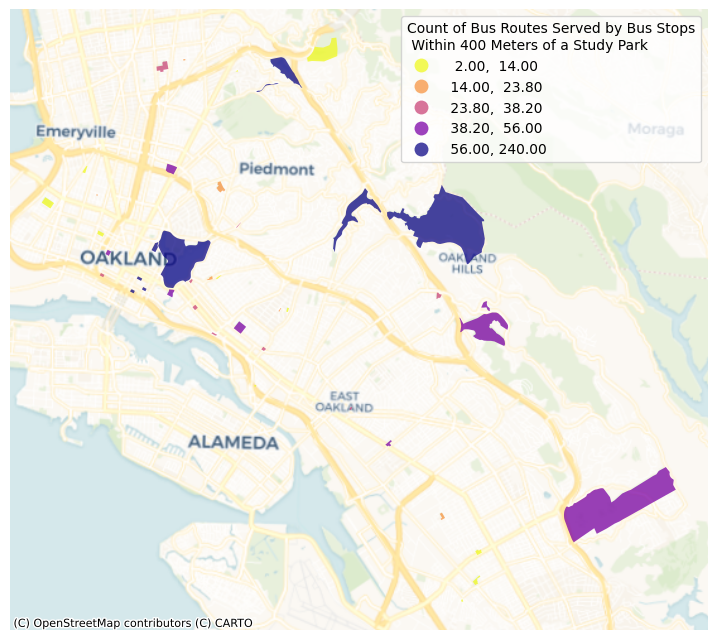

In [ ]:
# We can visualize the distribution of routes to get a sense of how “well-served” parks are arranged over space
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot quantile map of number of bus stops for every park
parks_w_routes.plot(
    column="route_count",
    scheme="quantiles",
    alpha=0.75,
    legend=True,
    legend_kwds={'loc': 'upper right', 'title': 'Count of Bus Routes Served by Bus Stops\n Within 400 Meters of a Study Park', 'alignment': 'left'},
    ax=ax,
    cmap=cmap
)
# Add basemap
cx.add_basemap(
    ax,
    crs=allparks_w_albers.crs.to_string(),
    source=cx.providers.CartoDB.Voyager,
)
# Remove axes
ax.set_axis_off();

In [ ]:
# Acquiring dataframe of parks with their priority area scores from spatial analysis module above
joined_data.dropna(subset=['name'], inplace=True)

In [ ]:
# Creating merged dataframe of park names, priority area scores, number of accessible bus stops and routes
joined_cleaned = joined_data[['name','FINAL_SC_1']]
joined_transit = joined_cleaned.merge(parks_w_counts, on="name", how="inner")
joined_transit = joined_transit[['name', 'FINAL_SC_1', 'poi_count']]
joined_transit_all = joined_transit.merge(parks_w_routes, on="name", how="inner")
joined_transit_all = joined_transit_all[['name', 'FINAL_SC_1', 'poi_count', 'route_count']]

In [ ]:
# Group by priority score and calculate the average bus stop count
avg_bus_stop_count_by_priority = joined_transit_all.groupby("FINAL_SC_1")["poi_count"].mean()
joined_transit_all["avg_bus_stops"] = avg_bus_stop_count_by_priority

# Display the result
avg_bus_stop_count_by_priority

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FINAL_SC_1
Highest    17.800000
High       23.833333
Medium     23.000000
Low        22.750000
Lowest     18.000000
Name: poi_count, dtype: float64

In [ ]:
# Group by priority score and calculate the average bus routes served in park proximity
avg_bus_route_count_by_priority = joined_transit_all.groupby("FINAL_SC_1")["route_count"].mean()
joined_transit_all["avg_bus_routes"] = avg_bus_route_count_by_priority

# Display the result
avg_bus_route_count_by_priority

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


FINAL_SC_1
Highest    41.900000
High       43.666667
Medium     51.083333
Low        50.500000
Lowest     69.133333
Name: route_count, dtype: float64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


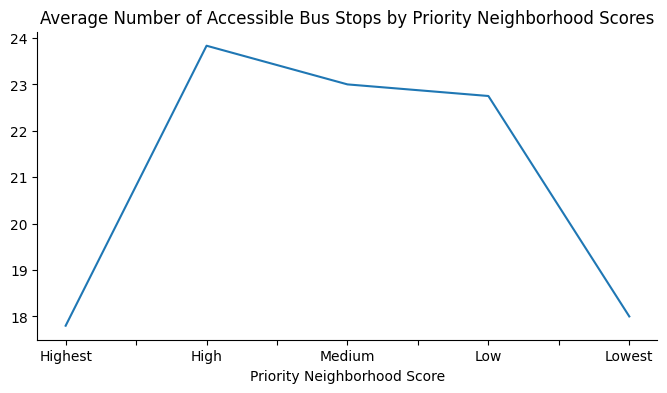

In [ ]:
# Plotting results from average bus stops vs. priority neighborhood score
avg_bus_stop_count_by_priority.plot(kind='line', figsize=(8, 4), title='Average Number of Accessible Bus Stops by Priority Neighborhood Scores')
plt.xlabel("Priority Neighborhood Score")
plt.gca().spines[['top', 'right']].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


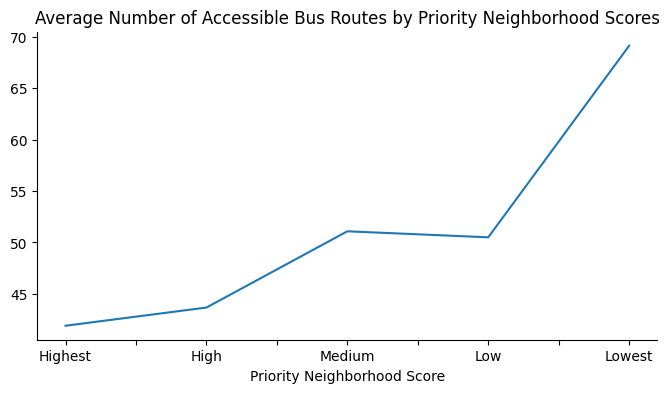

In [ ]:
# Plotting results from average bus routes vs. priority neighborhood score
avg_bus_route_count_by_priority.plot(kind='line', figsize=(8, 4), title='Average Number of Accessible Bus Routes by Priority Neighborhood Scores')
plt.xlabel("Priority Neighborhood Score")
plt.gca().spines[['top', 'right']].set_visible(False)